## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import json
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
import highlight_text
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mplsoccer import Pitch, VerticalPitch
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
from matplotlib.patches import Rectangle
import matplotlib.font_manager as font_manager
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
#import soccerdata as sd
import re
from unidecode import unidecode

pd.set_option("display.max_rows", None, "display.max_columns", None)
background = "black"
text_color = 'w'
primary = '#C8102E'
secondary = 'lightblue'
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

In [2]:
import matplotlib.font_manager as fm
from mplsoccer import FontManager

# Set the path to the locally downloaded font file
font_path = r'C:\Users\acer\Documents\GitHub\IndianCitizen\ScorePredict\Score Logos-20241022T100701Z-001\Score Logos\Sora_Font\Sora-Regular.ttf'

# Add the font to matplotlib
font_prop = fm.FontProperties(fname=font_path)

# You can now use this font in your plots
fm_sora = FontManager()
#fm_sora.prop = font_prop

print("Font loaded and registered successfully!")

Font loaded and registered successfully!


## Extracting Data

### WhoScored

In [356]:
teams_dict = {
    13: 'Arsenal',
    161: 'Wolves',
    24: 'Aston Villa',
    211: 'Brighton',
    30: 'Tottenham',
    167: 'Man City',
    14: 'Leicester',
    18: 'Southampton',
    183: 'Bournemouth',
    26: 'Liverpool',
    23: 'Newcastle',
    15: 'Chelsea',
    174: 'Nottingham Forest',
    29: 'West Ham',
    32: 'Man Utd'
}

In [3]:
def extract_json_from_html(html_path, save_output=False):
    with open(html_path, 'r', encoding='utf-8') as html_file:
        html = html_file.read()

    regex_pattern = r'(?<=require\.config\.params\["args"\].=.)[\s\S]*?;'
    data_txt = re.findall(regex_pattern, html)[0]

    # add quotations for JSON parser
    data_txt = data_txt.replace('matchId', '"matchId"')
    data_txt = data_txt.replace('matchCentreData', '"matchCentreData"')
    data_txt = data_txt.replace('matchCentreEventTypeJson', '"matchCentreEventTypeJson"')
    data_txt = data_txt.replace('formationIdNameMappings', '"formationIdNameMappings"')
    data_txt = data_txt.replace('};', '}')

    if save_output:
        # save JSON data to txt
        output_file = open(f"{html_path}.txt", "wt", encoding='utf-8')
        n = output_file.write(data_txt)
        output_file.close()

    return data_txt

def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]
    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict

In [404]:
import os

def process_file(i, all_teams_dict):
    match_html_path = f"C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Arsenal/{i}.html"
    
    try:
        json_data_txt = extract_json_from_html(match_html_path)
        data = json.loads(json_data_txt)
        
        events_dict, players_df, teams_dict = extract_data_from_dict(data)
        
        # Append teams_dict for this file
        all_teams_dict[i] = teams_dict
        
        # Save DataFrames to CSV
        df = pd.DataFrame(events_dict)
        df['teamName'] = df['teamId'].map(teams_dict)
        team_names = list(teams_dict.values())
        opposition_dict = {team_names[i]: team_names[1-i] for i in range(len(team_names))}
        df['oppositionTeamName'] = df['teamName'].map(opposition_dict)
        dfp = pd.DataFrame(players_df)

        os.makedirs(f"C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Arsenal/Data", exist_ok=True)
        os.makedirs(f"C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Arsenal/Data/Player", exist_ok=True)

        df.to_csv(f"C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Arsenal/Data/{i}.csv", index=False)
        dfp.to_csv(f"C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Arsenal/Data/Player/{i}.csv", index=False)
        
        print(f"Successfully processed file {match_html_path}")

    except Exception as e:
        print(f"Error processing file {match_html_path}: {e}")

# Main loop to process all files
all_teams_dict = {}  # Dictionary to store teams_dict for all files

for i in range(1, 15):
    process_file(i, all_teams_dict)

Successfully processed file C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Arsenal/1.html
Successfully processed file C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Arsenal/2.html
Successfully processed file C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Arsenal/3.html
Successfully processed file C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Arsenal/4.html
Successfully processed file C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Arsenal/5.html
Successfully processed file C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Arsenal/6.html
Successfully processed file C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Arsenal/7.html
Successfully processed file C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Arsenal/8.html
Successfully processed file C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Arsenal/9.html
Successfully processed file C:/Users/

In [405]:
import glob
import os

# Specify the directory containing the CSV files
folder_path = "C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Arsenal/Data/"

# Use glob to get all the CSV file paths
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# List to hold the DataFrames
dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    dfi = pd.read_csv(file)  # Read the CSV file
    dataframes.append(dfi)   # Append the DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

In [406]:
# Specify the directory containing the CSV files
folder_path = "C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/Arsenal/Data/Player/"

# Use glob to get all the CSV file paths
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# List to hold the DataFrames
dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    dfi = pd.read_csv(file)  # Read the CSV file
    dataframes.append(dfi)   # Append the DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
dfp = pd.concat(dataframes, ignore_index=True)

In [365]:
df.shape

(20328, 29)

In [407]:

# Extract the 'displayName' value
df['type'] = df['type'].str.extract(r"'displayName': '([^']+)")
df['outcomeType'] = df['outcomeType'].str.extract(r"'displayName': '([^']+)")
df['period'] = df['period'].str.extract(r"'displayName': '([^']+)")

# temprary use of typeId of period column
df['period'] = df['period'].replace({'FirstHalf': 1, 'SecondHalf': 2, 'FirstPeriodOfExtraTime': 3, 'SecondPeriodOfExtraTime': 4,
                                     'PenaltyShootout': 5, 'PostGame': 14, 'PreMatch': 16})

# new column for cumulative minutes, This part is taken from the "jakeyk11.github.io" github repository and modified for my use
def cumulative_match_mins(events_df):
    events_out = pd.DataFrame()
    # Add cumulative time to events data, resetting for each unique match
    match_events = events_df.copy()
    match_events['cumulative_mins'] = match_events['minute'] + (1/60) * match_events['second']
    # Add time increment to cumulative minutes based on period of game.
    for period in np.arange(1, match_events['period'].max() + 1, 1):
        if period > 1:
            t_delta = match_events[match_events['period'] == period - 1]['cumulative_mins'].max() - \
                                   match_events[match_events['period'] == period]['cumulative_mins'].min()
        elif period == 1 or period == 5:
            t_delta = 0
        else:
            t_delta = 0
        match_events.loc[match_events['period'] == period, 'cumulative_mins'] += t_delta
    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events])
    return events_out

df = cumulative_match_mins(df)

# Extracting the carry data and merge it with the main df, This part is also taken from the "jakeyk11.github.io" github repository and modified for my use
def insert_ball_carries(events_df, min_carry_length=3, max_carry_length=60, min_carry_duration=1, max_carry_duration=10):
    events_out = pd.DataFrame()
    # Carry conditions (convert from metres to opta)
    min_carry_length = 3.0
    max_carry_length = 60.0
    min_carry_duration = 1.0
    max_carry_duration = 10.0
    # match_events = events_df[events_df['match_id'] == match_id].reset_index()
    match_events = events_df.reset_index()
    match_carries = pd.DataFrame()

    for idx, match_event in match_events.iterrows():

        if idx < len(match_events) - 1:
            prev_evt_team = match_event['teamId']
            next_evt_idx = idx + 1
            init_next_evt = match_events.loc[next_evt_idx]
            take_ons = 0
            incorrect_next_evt = True

            while incorrect_next_evt:

                next_evt = match_events.loc[next_evt_idx]

                if next_evt['type'] == 'TakeOn' and next_evt['outcomeType'] == 'Successful':
                    take_ons += 1
                    incorrect_next_evt = True

                elif ((next_evt['type'] == 'TakeOn' and next_evt['outcomeType'] == 'Unsuccessful')
                      or (next_evt['teamId'] != prev_evt_team and next_evt['type'] == 'Challenge' and next_evt['outcomeType'] == 'Unsuccessful')
                      or (next_evt['type'] == 'Foul')):
                    incorrect_next_evt = True

                else:
                    incorrect_next_evt = False

                next_evt_idx += 1

            # Apply some conditioning to determine whether carry criteria is satisfied
            same_team = prev_evt_team == next_evt['teamId']
            not_ball_touch = match_event['type'] != 'BallTouch'
            dx = 105*(match_event['endX'] - next_evt['x'])/100
            dy = 68*(match_event['endY'] - next_evt['y'])/100
            far_enough = dx ** 2 + dy ** 2 >= min_carry_length ** 2
            not_too_far = dx ** 2 + dy ** 2 <= max_carry_length ** 2
            dt = 60 * (next_evt['cumulative_mins'] - match_event['cumulative_mins'])
            min_time = dt >= min_carry_duration
            same_phase = dt < max_carry_duration
            same_period = match_event['period'] == next_evt['period']

            valid_carry = same_team & not_ball_touch & far_enough & not_too_far & min_time & same_phase &same_period

            if valid_carry:
                carry = pd.DataFrame()
                prev = match_event
                nex = next_evt

                carry.loc[0, 'eventId'] = prev['eventId'] + 0.5
                carry['minute'] = np.floor(((init_next_evt['minute'] * 60 + init_next_evt['second']) + (
                        prev['minute'] * 60 + prev['second'])) / (2 * 60))
                carry['second'] = (((init_next_evt['minute'] * 60 + init_next_evt['second']) +
                                    (prev['minute'] * 60 + prev['second'])) / 2) - (carry['minute'] * 60)
                carry['teamId'] = nex['teamId']
                carry['x'] = prev['endX']
                carry['y'] = prev['endY']
                carry['expandedMinute'] = np.floor(((init_next_evt['expandedMinute'] * 60 + init_next_evt['second']) +
                                                    (prev['expandedMinute'] * 60 + prev['second'])) / (2 * 60))
                carry['period'] = nex['period']
                carry['type'] = carry.apply(lambda x: {'value': 99, 'displayName': 'Carry'}, axis=1)
                carry['outcomeType'] = 'Successful'
                carry['qualifiers'] = carry.apply(lambda x: {'type': {'value': 999, 'displayName': 'takeOns'}, 'value': str(take_ons)}, axis=1)
                carry['satisfiedEventsTypes'] = carry.apply(lambda x: [], axis=1)
                carry['isTouch'] = True
                carry['playerId'] = nex['playerId']
                carry['endX'] = nex['x']
                carry['endY'] = nex['y']
                carry['blockedX'] = np.nan
                carry['blockedY'] = np.nan
                carry['goalMouthZ'] = np.nan
                carry['goalMouthY'] = np.nan
                carry['isShot'] = np.nan
                carry['relatedEventId'] = nex['eventId']
                carry['relatedPlayerId'] = np.nan
                carry['isGoal'] = np.nan
                carry['cardType'] = np.nan
                carry['isOwnGoal'] = np.nan
                carry['type'] = 'Carry'
                carry['cumulative_mins'] = (prev['cumulative_mins'] + init_next_evt['cumulative_mins']) / 2

                match_carries = pd.concat([match_carries, carry], ignore_index=True, sort=False)

    match_events_and_carries = pd.concat([match_carries, match_events], ignore_index=True, sort=False)
    match_events_and_carries = match_events_and_carries.sort_values(['period', 'cumulative_mins']).reset_index(drop=True)

    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events_and_carries])

    return events_out

df = insert_ball_carries(df, min_carry_length=3, max_carry_length=60, min_carry_duration=1, max_carry_duration=10)

df = df.reset_index(drop=True)
df['index'] = range(1, len(df) + 1)
df = df[['index'] + [col for col in df.columns if col != 'index']]

# Assign xT values
df_base  = df
dfxT = df_base.copy()
dfxT['qualifiers'] = dfxT['qualifiers'].astype(str)
dfxT = dfxT[(~dfxT['qualifiers'].str.contains('Corner'))]
dfxT = dfxT[(dfxT['type'].isin(['Pass', 'Carry'])) & (dfxT['outcomeType']=='Successful')]


xT = pd.read_csv('https://raw.githubusercontent.com/mckayjohns/youtube-videos/main/data/xT_Grid.csv', header=None) # use this if you don't have your own xT value Grid
# xT = pd.read_csv("/content/xT_Grid.csv", header=None)    # use this if you have your own xT value Grid, then place your file path here
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

dfxT['x1_bin_xT'] = pd.cut(dfxT['x'], bins=xT_cols, labels=False)
dfxT['y1_bin_xT'] = pd.cut(dfxT['y'], bins=xT_rows, labels=False)
dfxT['x2_bin_xT'] = pd.cut(dfxT['endX'], bins=xT_cols, labels=False)
dfxT['y2_bin_xT'] = pd.cut(dfxT['endY'], bins=xT_rows, labels=False)

dfxT['start_zone_value_xT'] = dfxT[['x1_bin_xT', 'y1_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)
dfxT['end_zone_value_xT'] = dfxT[['x2_bin_xT', 'y2_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)

dfxT['xT'] = dfxT['end_zone_value_xT'] - dfxT['start_zone_value_xT']
columns_to_drop = ['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y', 'expandedMinute', 'period', 'outcomeType', 'qualifiers',  'type',
                   'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY', 'relatedEventId', 'relatedPlayerId', 'blockedX', 'blockedY',
                   'goalMouthZ', 'goalMouthY', 'isShot', 'cumulative_mins']
dfxT.drop(columns=columns_to_drop, inplace=True)

df = df.merge(dfxT, on='index', how='left')

# New Column for Team Names and Oppositon TeamNames
#df['teamName'] = df['teamId'].map(teams_dict)
#team_names = list(teams_dict.values())
#opposition_dict = {team_names[i]: team_names[1-i] for i in range(len(team_names))}
#df['oppositionTeamName'] = df['teamName'].map(opposition_dict)

# Reshaping the data from 100x100 to 105x68, as I use the pitch_type='uefa', in the pitch function, you can consider according to your use
df['x'] = df['x']*1.05
df['y'] = df['y']*0.68
df['endX'] = df['endX']*1.05
df['endY'] = df['endY']*0.68
df['goalMouthY'] = df['goalMouthY']*0.68

columns_to_drop = ['height', 'weight', 'age', 'isManOfTheMatch', 'field', 'stats',
                   'subbedInPlayerId', 'subbedOutPeriod',
                   'subbedOutExpandedMinute', 'subbedInPeriod', 'subbedInExpandedMinute', 'subbedOutPlayerId',
                   'teamId']
dfp.drop(columns=columns_to_drop, inplace=True)

# adding player name, shirt no. etc info
dfp = dfp.drop_duplicates(subset=['name'])
df = df.merge(dfp, on='playerId', how='left')

df['qualifiers'] = df['qualifiers'].astype(str)
# Calculating passing distance, to find out progressive pass, this will just show the distance reduced by a pass, then will be able to filter passes which has reduced distance value more than 10yds as a progressive pass
df['prog_pass'] = np.where((df['type'] == 'Pass'),
                           np.sqrt((105 - df['x'])**2 + (34 - df['y'])**2) - np.sqrt((105 - df['endX'])**2 + (34 - df['endY'])**2), 0)
# Calculating carrying distance, to find out progressive carry, this will just show the distance reduced by a carry, then will be able to filter carries which has reduced distance value more than 10yds as a progressive carry
df['prog_carry'] = np.where((df['type'] == 'Carry'),
                            np.sqrt((105 - df['x'])**2 + (34 - df['y'])**2) - np.sqrt((105 - df['endX'])**2 + (34 - df['endY'])**2), 0)
df['pass_or_carry_angle'] = np.degrees(np.arctan2(df['endY'] - df['y'], df['endX'] - df['x']))


# Making all the alphabets in the name as English Alphabets only (for example: Á will be replaced by A)
df['name'] = df['name'].astype(str)
df['name'] = df['name'].apply(unidecode)

# Function to extract short names
def get_short_name(full_name):
    if pd.isna(full_name):
        return full_name
    parts = full_name.split()
    if len(parts) == 1:
        return full_name  # No need for short name if there's only one word
    elif len(parts) == 2:
        return parts[0][0] + ". " + parts[1]
    else:
        return parts[0][0] + ". " + parts[1][0] + ". " + " ".join(parts[2:])

# Applying the function to create 'shortName' column
df['shortName'] = df['name'].apply(get_short_name)

df['qualifiers'] = df['qualifiers'].astype(str)
#columns_to_drop2 = ['id']
#df.drop(columns=columns_to_drop2, inplace=True)

df['period'] = df['period'].replace({1: 'FirstHalf', 2: 'SecondHalf', 3: 'FirstPeriodOfExtraTime', 4: 'SecondPeriodOfExtraTime',
                                     5: 'PenaltyShootout', 14: 'PostGame', 16: 'PreMatch'})


C:\Users\acer\AppData\Local\Temp\ipykernel_13912\3822741489.py:156: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfxT['start_zone_value_xT'] = dfxT[['x1_bin_xT', 'y1_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)
C:\Users\acer\AppData\Local\Temp\ipykernel_13912\3822741489.py:157: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfxT['end_zone_value_xT'] = dfxT[['x2_bin_xT', 'y2_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)


In [409]:
df1 = df.sort_values('id').reset_index(drop=True)

In [415]:
df1['oppositionTeamName_x'].unique()

array(['Wolves', 'Arsenal', 'Aston Villa', 'Brighton', 'Tottenham',
       'Man City', 'Leicester', 'Southampton', 'Bournemouth', 'Liverpool',
       'Newcastle', 'Chelsea', 'Nottingham Forest', 'West Ham', 'Man Utd',
       nan], dtype=object)

In [416]:
df1.shape

(24250, 51)

In [414]:
df1.columns

Index(['index', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers',
       'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY',
       'blockedX', 'blockedY', 'goalMouthZ', 'goalMouthY', 'isShot',
       'relatedEventId', 'relatedPlayerId', 'isGoal_x', 'cardType_x',
       'isOwnGoal_x', 'cumulative_mins', 'id', 'teamName_x',
       'oppositionTeamName_x', 'isGoal_y', 'cardType_y', 'isOwnGoal_y',
       'teamName_y', 'oppositionTeamName_y', 'x1_bin_xT', 'y1_bin_xT',
       'x2_bin_xT', 'y2_bin_xT', 'start_zone_value_xT', 'end_zone_value_xT',
       'xT', 'shirtNo', 'name', 'position', 'isFirstEleven', 'prog_pass',
       'prog_carry', 'pass_or_carry_angle', 'shortName'],
      dtype='object')

In [467]:
df_team = df1[df1['teamName_x'] == 'Arsenal']

In [420]:
df_team.tail()

,index,eventId,minute,second,teamId,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,playerId,endX,endY,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,relatedEventId,relatedPlayerId,isGoal_x,cardType_x,isOwnGoal_x,cumulative_mins,id,teamName_x,oppositionTeamName_x,isGoal_y,cardType_y,isOwnGoal_y,teamName_y,oppositionTeamName_y,x1_bin_xT,y1_bin_xT,x2_bin_xT,y2_bin_xT,start_zone_value_xT,end_zone_value_xT,xT,shirtNo,name,position,isFirstEleven,prog_pass,prog_carry,pass_or_carry_angle,shortName
20316,8248,793.0,32.0,21.0,13,39.690,6.256,32.0,FirstHalf,BallTouch,Successful,"[{'type': {'value': 178, 'displayName': 'Stand...",[91],True,388650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.350000,2.755482e+09,Arsenal,Man Utd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,Jurrien Timber,Sub,NaN,0.000000,0.0,NaN,J. Timber
20317,10478,794.0,42.0,1.0,13,6.300,38.012,42.0,FirstHalf,Error,Successful,"[{'type': {'value': 169, 'displayName': 'Leadi...",[99],False,424462.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.016667,2.755486e+09,Arsenal,Man Utd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,Jakub Kiwior,Sub,NaN,0.000000,0.0,NaN,J. Kiwior
20318,15087,795.0,56.0,53.0,13,50.610,37.060,58.0,SecondHalf,BallRecovery,Successful,[],[93],False,273257.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.233333,2.755496e+09,Arsenal,Man Utd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,Oleksandr Zinchenko,DL,True,0.000000,0.0,NaN,O. Zinchenko
20319,20431,797.0,79.0,44.0,13,73.185,61.744,81.0,SecondHalf,BallTouch,Successful,"[{'type': {'value': 56, 'displayName': 'Zone'}...",[91],True,113994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.083333,2.755499e+09,Arsenal,Man Utd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,Leandro Trossard,Sub,NaN,0.000000,0.0,NaN,L. Trossard
20324,18072,798.0,69.0,15.0,13,30.555,30.396,71.0,SecondHalf,Pass,Successful,"[{'type': {'value': 178, 'displayName': 'Stand...","[91, 117, 30, 36, 38, 216, 218]",True,238940.0,43.26,7.684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.600000,2.755503e+09,Arsenal,Man Utd,NaN,NaN,NaN,Arsenal,Man Utd,3.0,3.0,4.0,0.0,0.011324,0.011263,-0.000061,5.0,Thomas Partey,MC,True,7.417662,0.0,-60.777529,T. Partey


In [418]:
df_team[df_team['type'] == 'Goal'].shape

(27, 51)

## ShotMap

In [63]:
df_shots = pd.read_csv('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Data/EPL/2024-25/shot_data.csv')

In [34]:
df_shots.columns

Index(['Unnamed: 0', 'id', 'minute', 'result', 'X', 'Y', 'xG', 'player', 'h_a',
       'player_id', 'situation', 'season', 'shotType', 'match_id', 'h_team',
       'a_team', 'h_goals', 'a_goals', 'date', 'player_assisted',
       'lastAction'],
      dtype='object')

In [61]:
df_shots['shotType'].unique()

array(['RightFoot', 'Head', 'LeftFoot', 'OtherBodyPart'], dtype=object)

C:\Users\acer\AppData\Local\Temp\ipykernel_752\2929526590.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X'] = (df['X'] / 100) * 105 * 100
C:\Users\acer\AppData\Local\Temp\ipykernel_752\2929526590.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y'] = (df['Y'] / 100) * 68 * 100
C:\Users\acer\AppData\Local\Temp\ipykernel_752\2929526590.py:78: RuntimeWarning: invalid value encountered in scalar divide
  xG_per_shot_o = total_xG_o / total_shots_o


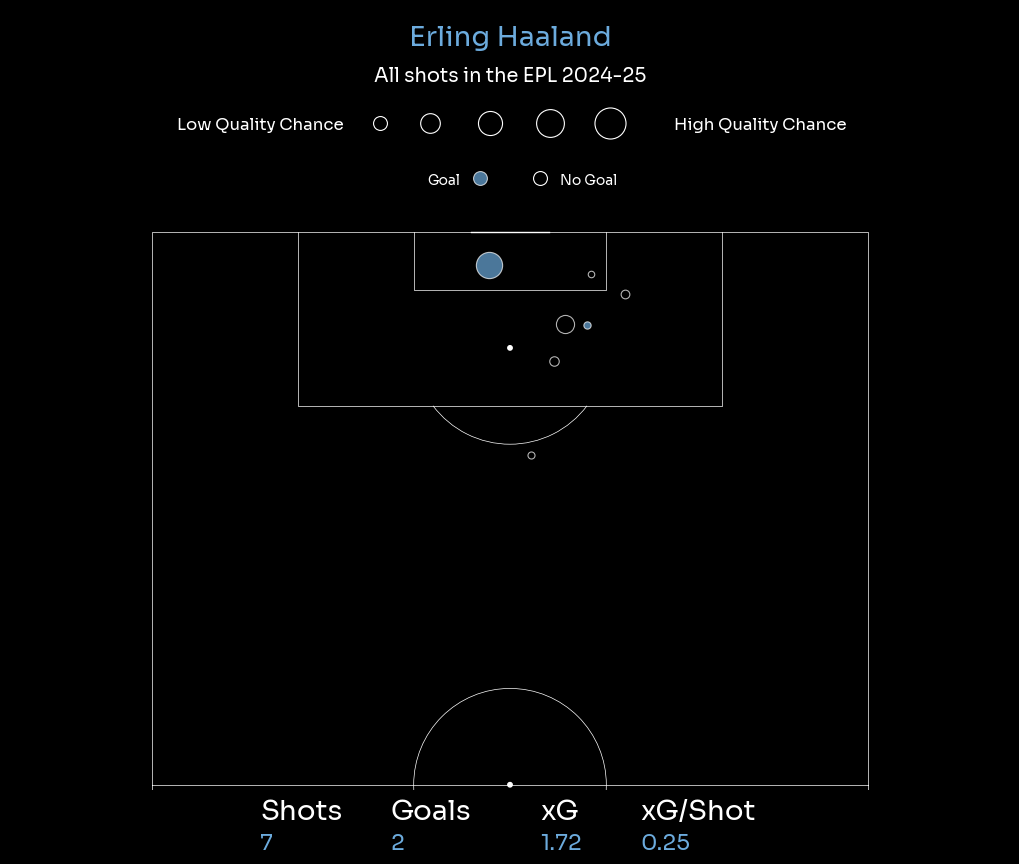

In [69]:
team = 'Manchester City'
league = 'EPL'
teamcolor = '#6CABDD'
situation=None
shotType = "RightFoot"
player = "Erling Haaland"
plot_shotmap_player(df_shots,team,league,teamcolor,player,situation,shotType)

In [68]:
def plot_shotmap_understat_player(df_shots,team,league,teamcolor,player,situation,shotType):
    df1 = df_shots[(df_shots['h_team'] == team) & (df_shots['h_a'] == 'h')]
    df2 = df_shots[(df_shots['a_team'] == team) & (df_shots['h_a'] == 'a')]
    teamdf = pd.concat([df1, df2], ignore_index=True)
    df = teamdf[teamdf['player'] == player]
    df['X'] = (df['X'] / 100) * 105 * 100
    df['Y'] = (df['Y'] / 100) * 68 * 100
    total_shots = df.shape[0]
    total_goals = df[df['result'] == 'Goal'].shape[0]
    total_xG = df['xG'].sum()
    xG_per_shot = total_xG / total_shots
    points_average_distance = df['X'].mean()
    actual_average_distance = 105 - (df['X'] * 1.2).mean()

    if situation != None:
        ## OpenPlay
        df_openplay = df[df['situation'] == 'OpenPlay']
        total_shots_op = df_openplay.shape[0]
        total_goals_op = df_openplay[df_openplay['result'] == 'Goal'].shape[0]
        total_xG_op = df_openplay['xG'].sum()
        xG_per_shot_op = total_xG_op / total_shots_op
    
        ## FromCorner
        df_fromcorner = df[df['situation'] == 'FromCorner']
        total_shots_c = df_fromcorner.shape[0]
        total_goals_c = df_fromcorner[df_fromcorner['result'] == 'Goal'].shape[0]
        total_xG_c = df_fromcorner['xG'].sum()
        xG_per_shot_c = total_xG_c / total_shots_c
    
        ## SetPiece
        df_setpiece = df[df['situation'] == 'SetPiece']
        total_shots_sp = df_setpiece.shape[0]
        total_goals_sp = df_setpiece[df_setpiece['result'] == 'Goal'].shape[0]
        total_xG_sp = df_setpiece['xG'].sum()
        xG_per_shot_sp = total_xG_sp / total_shots_sp
    
        ## DirectFreekick
        df_freekick = df[df['situation'] == 'DirectFreekick']
        total_shots_fk = df_freekick.shape[0]
        total_goals_fk = df_freekick[df_freekick['result'] == 'Goal'].shape[0]
        total_xG_fk = df_freekick['xG'].sum()
        xG_per_shot_fk = total_xG_fk / total_shots_fk
    
        ## Penalty
        df_penalty = df[df['situation'] == 'Penalty']
        total_shots_p = df_penalty.shape[0]
        total_goals_p = df_penalty[df_penalty['result'] == 'Goal'].shape[0]
        total_xG_p = df_penalty['xG'].sum()
        xG_per_shot_p = total_xG_p / total_shots_p

    if shotType != None:
        ## RightFoot
        df_rf = df[df['shotType'] == 'RightFoot']
        total_shots_rf = df_rf.shape[0]
        total_goals_rf = df_rf[df_rf['result'] == 'Goal'].shape[0]
        total_xG_rf = df_rf['xG'].sum()
        xG_per_shot_rf = total_xG_rf / total_shots_rf

        ## LeftFoot
        df_lf = df[df['shotType'] == 'LeftFoot']
        total_shots_lf = df_lf.shape[0]
        total_goals_lf = df_lf[df_lf['result'] == 'Goal'].shape[0]
        total_xG_lf = df_lf['xG'].sum()
        xG_per_shot_lf = total_xG_lf / total_shots_lf

        ## Head
        df_h = df[df['shotType'] == 'Head']
        total_shots_h = df_h.shape[0]
        total_goals_h = df_h[df_h['result'] == 'Goal'].shape[0]
        total_xG_h = df_h['xG'].sum()
        xG_per_shot_h = total_xG_h / total_shots_h

        ## OtherBodyPart
        df_o = df[df['shotType'] == 'OtherBodyPart']
        total_shots_o = df_o.shape[0]
        total_goals_o = df_o[df_o['result'] == 'Goal'].shape[0]
        total_xG_o = df_o['xG'].sum()
        xG_per_shot_o = total_xG_o / total_shots_o

    
    pitch = VerticalPitch(
    pitch_type='uefa', 
    half=True, 
    pitch_color=background, 
    pad_bottom=.5, 
    line_color='white',
    linewidth=.5,
    axis=True, 
    label=True
    )

    # create a subplot with 2 rows and 1 column
    fig = plt.figure(figsize=(10, 12))
    fig.patch.set_facecolor(background)


    # Top row for the team names and score
    # [left, bottom, width, height]

    ax1 = fig.add_axes([0, 0.7, 1, .2])
    ax1.set_facecolor(background)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    ax1.text(
        x=0.5, 
        y=.85, 
        s=player, 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color=teamcolor, 
        ha='center'
    )
    ax1.text(
        x=0.5, 
        y=.7, 
        s=f'All shots in the {league} 2024-25', 
        fontsize=14,
        fontweight='bold',
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )
    ax1.text(
        x=0.25, 
        y=0.5, 
        s=f'Low Quality Chance', 
        fontsize=12, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    # add a scatter point between the two texts
    ax1.scatter(
        x=0.37, 
        y=0.53, 
        s=100, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.42, 
        y=0.53, 
        s=200, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.48, 
        y=0.53, 
        s=300, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.54, 
        y=0.53, 
        s=400, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.6, 
        y=0.53, 
        s=500, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )

    ax1.text(
        x=0.75, 
        y=0.5, 
        s=f'High Quality Chance', 
        fontsize=12, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )


    ax1.text(
        x=0.45, 
        y=0.27, 
        s=f'Goal', 
        fontsize=10, 
        fontproperties=font_prop, 
        color='white', 
        ha='right'
    )
    ax1.scatter(
        x=0.47, 
        y=0.3, 
        s=100, 
        color=teamcolor, 
        edgecolor='white', 
        linewidth=.8,
        alpha=.7
    )


    ax1.scatter(
        x=0.53, 
        y=0.3, 
        s=100, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )

    ax1.text(
        x=0.55, 
        y=0.27, 
        s=f'No Goal', 
        fontsize=10, 
        fontproperties=font_prop, 
        color='white', 
        ha='left'
    )

    ax1.set_axis_off()

    
    ax2 = fig.add_axes([.05, 0.25, .9, .5])
    ax2.set_facecolor(background)
    
    pitch.draw(ax=ax2)

    '''
    # create a scatter plot at y 100 - average_distance
    ax2.scatter(
        x=60, 
        y=points_average_distance, 
        s=100, 
        color='white',  
        linewidth=.8
    )
    # create a line from the bottom of the pitch to the scatter point
    ax2.plot(
        [60, 60], 
        [105, points_average_distance], 
        color='white', 
        linewidth=2
    )

    # Add a text label for the average distance
    ax2.text(
        x=60, 
        y=points_average_distance - 4, 
        s=f'Average Distance\n{actual_average_distance:.1f} yards', 
        fontsize=10, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center'
    )

    '''
    if situation != None:
        if situation == "all":
            for x in df.to_dict(orient='records'):
                pitch.scatter(
                    x['X'], 
                    x['Y'], 
                    s=400 * x['xG'], 
                    color=teamcolor if x['result'] == 'Goal' else background, 
                    ax=ax2,
                    alpha=.7,
                    linewidth=.8,
                    edgecolor='white'
                )
        elif situation == "OpenPlay":
            for x in df_openplay.to_dict(orient='records'):
                pitch.scatter(
                    x['X'], 
                    x['Y'], 
                    s=400 * x['xG'], 
                    color=teamcolor if x['result'] == 'Goal' else background, 
                    ax=ax2,
                    alpha=.7,
                    linewidth=.8,
                    edgecolor='white'
                )
        elif situation == "FromCorner":
            for x in df_fromcorner.to_dict(orient='records'):
                pitch.scatter(
                    x['X'], 
                    x['Y'], 
                    s=400 * x['xG'], 
                    color=teamcolor if x['result'] == 'Goal' else background, 
                    ax=ax2,
                    alpha=.7,
                    linewidth=.8,
                    edgecolor='white'
                )
        elif situation == "SetPiece":
            for x in df_setpiece.to_dict(orient='records'):
                pitch.scatter(
                    x['X'], 
                    x['Y'], 
                    s=400 * x['xG'], 
                    color=teamcolor if x['result'] == 'Goal' else background, 
                    ax=ax2,
                    alpha=.7,
                    linewidth=.8,
                    edgecolor='white'
                )
    
        elif situation == "DirectFreekick":
            for x in df_freekick.to_dict(orient='records'):
                pitch.scatter(
                    x['X'], 
                    x['Y'], 
                    s=400 * x['xG'], 
                    color=teamcolor if x['result'] == 'Goal' else background, 
                    ax=ax2,
                    alpha=.7,
                    linewidth=.8,
                    edgecolor='white'
                )
        elif situation == "Penalty":
            for x in df_penalty.to_dict(orient='records'):
                pitch.scatter(
                    x['X'], 
                    x['Y'], 
                    s=400 * x['xG'], 
                    color=teamcolor if x['result'] == 'Goal' else background, 
                    ax=ax2,
                    alpha=.7,
                    linewidth=.8,
                    edgecolor='white'
                )

    if shotType != None:
        if shotType == "RightFoot":
            for x in df_rf.to_dict(orient='records'):
                pitch.scatter(
                    x['X'], 
                    x['Y'], 
                    s=400 * x['xG'], 
                    color=teamcolor if x['result'] == 'Goal' else background, 
                    ax=ax2,
                    alpha=.7,
                    linewidth=.8,
                    edgecolor='white'
                )
        elif shotType == "LeftFoot":
            for x in df_lf.to_dict(orient='records'):
                pitch.scatter(
                    x['X'], 
                    x['Y'], 
                    s=400 * x['xG'], 
                    color=teamcolor if x['result'] == 'Goal' else background, 
                    ax=ax2,
                    alpha=.7,
                    linewidth=.8,
                    edgecolor='white'
                )
        elif shotType == "Head":
            for x in df_h.to_dict(orient='records'):
                pitch.scatter(
                    x['X'], 
                    x['Y'], 
                    s=400 * x['xG'], 
                    color=teamcolor if x['result'] == 'Goal' else background, 
                    ax=ax2,
                    alpha=.7,
                    linewidth=.8,
                    edgecolor='white'
                )
        elif shotType == "Other":
            for x in df_o.to_dict(orient='records'):
                pitch.scatter(
                    x['X'], 
                    x['Y'], 
                    s=400 * x['xG'], 
                    color=teamcolor if x['result'] == 'Goal' else background, 
                    ax=ax2,
                    alpha=.7,
                    linewidth=.8,
                    edgecolor='white'
                )
        
    ax2.set_axis_off()
    
    # add another axis for the stats
    ax3 = fig.add_axes([0, .2, 1, .05])
    ax3.set_facecolor(background)
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)

    ax3.text(
        x=0.25, 
        y=.5, 
        s='Shots', 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    if situation != None:
        if situation == 'OpenPlay':
            shots_text = total_shots_op
        elif situation == 'FromCorner':
            shots_text = total_shots_c
        elif situation == 'SetPiece':
            shots_text = total_shots_sp
        elif situation == 'DirectFreekick':
            shots_text = total_shots_fk
        elif situation == 'Penalty':
            shots_text = total_shots_p
        else:
            shots_text = total_shots

    if shotType != None:
        if shotType == 'RightFoot':
            shots_text = total_shots_rf
        elif shotType == 'LeftFoot':
            shots_text = total_shots_lf
        elif shotType == 'Head':
            shots_text = total_shots_h
        elif shotType == 'Others':
            shots_text = total_shots_o
        else:
            shots_text = total_shots
    
    ax3.text(
        x=0.25, 
        y=0, 
        s=f'{shots_text}', 
        fontsize=16, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.38, 
        y=.5, 
        s='Goals', 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    if situation != None:
        if situation == 'OpenPlay':
            goals_text = total_goals_op
        elif situation == 'FromCorner':
            goals_text = total_goals_c
        elif situation == 'SetPiece':
            goals_text = total_goals_sp
        elif situation == 'DirectFreekick':
            goals_text = total_goals_fk
        elif situation == 'Penalty':
            goals_text = total_goals_p
        else:
            goals_text = total_goals

    if shotType != None:
        if shotType == 'RightFoot':
            goals_text = total_goals_rf
        elif shotType == 'LeftFoot':
            goals_text = total_goals_lf
        elif shotType == 'Head':
            goals_text = total_goals_h
        elif shotType == 'Others':
            goals_text = total_goals_o
        else:
            goals_text = total_goals
    
    ax3.text(
        x=0.38, 
        y=0, 
        s=f'{goals_text}', 
        fontsize=16, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.53, 
        y=.5, 
        s='xG', 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    if situation != None:
        if situation == 'OpenPlay':
            xG_text = total_xG_op
        elif situation == 'FromCorner':
            xG_text = total_xG_c
        elif situation == 'SetPiece':
            xG_text = total_xG_sp
        elif situation == 'DirectFreekick':
            xG_text = total_xG_fk
        elif situation == 'Penalty':
            xG_text = total_xG_p
        else:
            xG_text = total_xG

    if shotType != None:
        if shotType == 'RightFoot':
            xG_text = total_xG_rf
        elif shotType == 'LeftFoot':
            xG_text = total_xG_lf
        elif shotType == 'Head':
            xG_text = total_xG_h
        elif shotType == 'Others':
            xG_text = total_xG_o
        else:
            xG_text = total_xG
    ax3.text(
        x=0.53, 
        y=0, 
        s=f'{xG_text:.2f}', 
        fontsize=16, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.63, 
        y=.5, 
        s='xG/Shot', 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    if situation != None:
        if situation == 'OpenPlay':
            xG_per_shot_text = xG_per_shot_op
        elif situation == 'FromCorner':
            xG_per_shot_text = xG_per_shot_c
        elif situation == 'SetPiece':
            xG_per_shot_text = xG_per_shot_sp
        elif situation == 'DirectFreekick':
            xG_per_shot_text = xG_per_shot_fk
        elif situation == 'Penalty':
            xG_per_shot_text = xG_per_shot_p
        else:
            xG_per_shot_text = xG_per_shot

    if shotType != None:
        if shotType == 'RightFoot':
            xG_per_shot_text = xG_per_shot_rf
        elif shotType == 'LeftFoot':
            xG_per_shot_text = xG_per_shot_lf
        elif shotType == 'Head':
            xG_per_shot_text = xG_per_shot_h
        elif shotType == 'Others':
            xG_per_shot_text = xG_per_shot_o
        else:
            xG_per_shot = xG_per_shot
    
    ax3.text(
        x=0.63, 
        y=0, 
        s=f'{xG_per_shot_text:.2f}', 
        fontsize=16, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.set_axis_off()


In [57]:
def plot_shotmap(df_shots,team,league,teamcolor,situation):
    df1 = df_shots[(df_shots['h_team'] == team) & (df_shots['h_a'] == 'h') & (df_shots['result'] != 'OwnGoal')]
    df2 = df_shots[(df_shots['a_team'] == team) & (df_shots['h_a'] == 'a') & (df_shots['result'] != 'OwnGoal')]
    df = pd.concat([df1, df2], ignore_index=True)
    df['X'] = (df['X'] / 100) * 105 * 100
    df['Y'] = (df['Y'] / 100) * 68 * 100

    ## ALL
    total_shots = df.shape[0]
    total_goals = df[df['result'] == 'Goal'].shape[0]
    total_xG = df['xG'].sum()
    xG_per_shot = total_xG / total_shots

    top_5 = df.groupby('player')['id'].count()
    top_5_shooters = top_5.sort_values(ascending=False).head(5)
    top_5_shooters_df = top_5_shooters.reset_index()
    top_5_shooters_df.columns = ['player', 'number_of_shots']

    
    ## OpenPlay
    df_openplay = df[df['situation'] == 'OpenPlay']
    total_shots_op = df_openplay.shape[0]
    total_goals_op = df_openplay[df_openplay['result'] == 'Goal'].shape[0]
    total_xG_op = df_openplay['xG'].sum()
    xG_per_shot_op = total_xG_op / total_shots_op

    top_5_op = df_openplay.groupby('player')['id'].count()
    top_5_shooters_op = top_5_op.sort_values(ascending=False).head(5)
    top_5_shooters_df_op = top_5_shooters_op.reset_index()
    top_5_shooters_df_op.columns = ['player', 'number_of_shots']

    ## FromCorner
    df_fromcorner = df[df['situation'] == 'FromCorner']
    total_shots_c = df_fromcorner.shape[0]
    total_goals_c = df_fromcorner[df_fromcorner['result'] == 'Goal'].shape[0]
    total_xG_c = df_fromcorner['xG'].sum()
    xG_per_shot_c = total_xG_c / total_shots_c

    top_5_fc = df_fromcorner.groupby('player')['id'].count()
    top_5_shooters_fc = top_5_fc.sort_values(ascending=False).head(5)
    top_5_shooters_df_fc = top_5_shooters_fc.reset_index()
    top_5_shooters_df_fc.columns = ['player', 'number_of_shots']

    ## SetPiece
    df_setpiece = df[df['situation'] == 'SetPiece']
    total_shots_sp = df_setpiece.shape[0]
    total_goals_sp = df_setpiece[df_setpiece['result'] == 'Goal'].shape[0]
    total_xG_sp = df_setpiece['xG'].sum()
    xG_per_shot_sp = total_xG_sp / total_shots_sp

    top_5_sp = df_setpiece.groupby('player')['id'].count()
    top_5_shooters_sp = top_5_sp.sort_values(ascending=False).head(5)
    top_5_shooters_df_sp = top_5_shooters_sp.reset_index()
    top_5_shooters_df_sp.columns = ['player', 'number_of_shots']

    ## DirectFreekick
    df_freekick = df[df['situation'] == 'DirectFreekick']
    total_shots_fk = df_freekick.shape[0]
    total_goals_fk = df_freekick[df_freekick['result'] == 'Goal'].shape[0]
    total_xG_fk = df_freekick['xG'].sum()
    xG_per_shot_fk = total_xG_fk / total_shots_fk

    top_5_fk = df_freekick.groupby('player')['id'].count()
    top_5_shooters_fk = top_5_fk.sort_values(ascending=False).head(5)
    top_5_shooters_df_fk = top_5_shooters_fk.reset_index()
    top_5_shooters_df_fk.columns = ['player', 'number_of_shots']

    ## Penalty
    df_penalty = df[df['situation'] == 'Penalty']
    total_shots_p = df_penalty.shape[0]
    total_goals_p = df_penalty[df_penalty['result'] == 'Goal'].shape[0]
    total_xG_p = df_penalty['xG'].sum()
    xG_per_shot_p = total_xG_p / total_shots_p

    top_5_p = df_penalty.groupby('player')['id'].count()
    top_5_shooters_p = top_5_p.sort_values(ascending=False).head(5)
    top_5_shooters_df_p = top_5_shooters_p.reset_index()
    top_5_shooters_df_p.columns = ['player', 'number_of_shots']
    
    
    points_average_distance = df['X'].mean()
    actual_average_distance = 105 - (df['X'] * 1.2).mean()

    
    pitch = VerticalPitch(
    pitch_type='uefa', 
    half=True, 
    pitch_color=background, 
    pad_bottom=.5, 
    line_color='white',
    linewidth=.5,
    axis=True, 
    label=True
    )

    # create a subplot with 2 rows and 1 column
    fig = plt.figure(figsize=(10, 12))
    fig.patch.set_facecolor(background)


    # Top row for the team names and score
    # [left, bottom, width, height]

    ax1 = fig.add_axes([0, 0.7, 1, .2])
    ax1.set_facecolor(background)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    ax1.text(
        x=0.5, 
        y=.85, 
        s=team, 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color=teamcolor, 
        ha='center'
    )
    ax1.text(
        x=0.5, 
        y=.7, 
        s=f'All shots in the {league} 2024-25', 
        fontsize=14,
        fontweight='bold',
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )
    ax1.text(
        x=0.25, 
        y=0.5, 
        s=f'Low Quality Chance', 
        fontsize=12, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    # add a scatter point between the two texts
    ax1.scatter(
        x=0.37, 
        y=0.53, 
        s=100, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.42, 
        y=0.53, 
        s=200, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.48, 
        y=0.53, 
        s=300, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.54, 
        y=0.53, 
        s=400, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.6, 
        y=0.53, 
        s=500, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )

    ax1.text(
        x=0.75, 
        y=0.5, 
        s=f'High Quality Chance', 
        fontsize=12, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )


    ax1.text(
        x=0.45, 
        y=0.27, 
        s=f'Goal', 
        fontsize=10, 
        fontproperties=font_prop, 
        color='white', 
        ha='right'
    )
    ax1.scatter(
        x=0.47, 
        y=0.3, 
        s=100, 
        color=teamcolor, 
        edgecolor='white', 
        linewidth=.8,
        alpha=.7
    )


    ax1.scatter(
        x=0.53, 
        y=0.3, 
        s=100, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )

    ax1.text(
        x=0.55, 
        y=0.27, 
        s=f'No Goal', 
        fontsize=10, 
        fontproperties=font_prop, 
        color='white', 
        ha='left'
    )

    ax1.set_axis_off()

    
    ax2 = fig.add_axes([.05, 0.25, .9, .5])
    ax2.set_facecolor(background)
    
    pitch.draw(ax=ax2)

    '''
    # create a scatter plot at y 100 - average_distance
    ax2.scatter(
        x=60, 
        y=points_average_distance, 
        s=100, 
        color='white',  
        linewidth=.8
    )
    # create a line from the bottom of the pitch to the scatter point
    ax2.plot(
        [60, 60], 
        [105, points_average_distance], 
        color='white', 
        linewidth=2
    )

    # Add a text label for the average distance
    ax2.text(
        x=60, 
        y=points_average_distance - 4, 
        s=f'Average Distance\n{actual_average_distance:.1f} yards', 
        fontsize=10, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center'
    )

    '''
    if situation == "all":
        for x in df.to_dict(orient='records'):
            pitch.scatter(
                x['X'], 
                x['Y'], 
                s=400 * x['xG'], 
                color=teamcolor if x['result'] == 'Goal' else background, 
                ax=ax2,
                alpha=.7,
                linewidth=.8,
                edgecolor='white'
            )
    elif situation == "OpenPlay":
        for x in df_openplay.to_dict(orient='records'):
            pitch.scatter(
                x['X'], 
                x['Y'], 
                s=400 * x['xG'], 
                color=teamcolor if x['result'] == 'Goal' else background, 
                ax=ax2,
                alpha=.7,
                linewidth=.8,
                edgecolor='white'
            )
    elif situation == "FromCorner":
        for x in df_fromcorner.to_dict(orient='records'):
            pitch.scatter(
                x['X'], 
                x['Y'], 
                s=400 * x['xG'], 
                color=teamcolor if x['result'] == 'Goal' else background, 
                ax=ax2,
                alpha=.7,
                linewidth=.8,
                edgecolor='white'
            )
    elif situation == "SetPiece":
        for x in df_setpiece.to_dict(orient='records'):
            pitch.scatter(
                x['X'], 
                x['Y'], 
                s=400 * x['xG'], 
                color=teamcolor if x['result'] == 'Goal' else background, 
                ax=ax2,
                alpha=.7,
                linewidth=.8,
                edgecolor='white'
            )

    elif situation == "DirectFreekick":
        for x in df_freekick.to_dict(orient='records'):
            pitch.scatter(
                x['X'], 
                x['Y'], 
                s=400 * x['xG'], 
                color=teamcolor if x['result'] == 'Goal' else background, 
                ax=ax2,
                alpha=.7,
                linewidth=.8,
                edgecolor='white'
            )
    elif situation == "Penalty":
        for x in df_penalty.to_dict(orient='records'):
            pitch.scatter(
                x['X'], 
                x['Y'], 
                s=400 * x['xG'], 
                color=teamcolor if x['result'] == 'Goal' else background, 
                ax=ax2,
                alpha=.7,
                linewidth=.8,
                edgecolor='white'
            )
        
    ax2.set_axis_off()
    
    # add another axis for the stats
    ax3 = fig.add_axes([0, .2, 1, .05])
    ax3.set_facecolor(background)
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)

    ax3.text(
        x=0.25, 
        y=.5, 
        s='Shots', 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    if situation == 'OpenPlay':
        shots_text = total_shots_op
    elif situation == 'FromCorner':
        shots_text = total_shots_c
    elif situation == 'SetPiece':
        shots_text = total_shots_sp
    elif situation == 'DirectFreekick':
        shots_text = total_shots_fk
    elif situation == 'Penalty':
        shots_text = total_shots_p
    else:
        shots_text = total_shots
    
    ax3.text(
        x=0.25, 
        y=0, 
        s=f'{shots_text}', 
        fontsize=16, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.38, 
        y=.5, 
        s='Goals', 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    if situation == 'OpenPlay':
        goals_text = total_goals_op
    elif situation == 'FromCorner':
        goals_text = total_goals_c
    elif situation == 'SetPiece':
        goals_text = total_goals_sp
    elif situation == 'DirectFreekick':
        goals_text = total_goals_fk
    elif situation == 'Penalty':
        goals_text = total_goals_p
    else:
        goals_text = total_goals
    ax3.text(
        x=0.38, 
        y=0, 
        s=f'{goals_text}', 
        fontsize=16, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.53, 
        y=.5, 
        s='xG', 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    if situation == 'OpenPlay':
        xG_text = total_xG_op
    elif situation == 'FromCorner':
        xG_text = total_xG_c
    elif situation == 'SetPiece':
        xG_text = total_xG_sp
    elif situation == 'DirectFreekick':
        xG_text = total_xG_fk
    elif situation == 'Penalty':
        xG_text = total_xG_p
    else:
        xG_text = total_xG
    ax3.text(
        x=0.53, 
        y=0, 
        s=f'{xG_text:.2f}', 
        fontsize=16, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.63, 
        y=.5, 
        s='xG/Shot', 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    if situation == 'OpenPlay':
        xG_per_shot_text = xG_per_shot_op
    elif situation == 'FromCorner':
        xG_per_shot_text = xG_per_shot_c
    elif situation == 'SetPiece':
        xG_per_shot_text = xG_per_shot_sp
    elif situation == 'DirectFreekick':
        xG_per_shot_text = xG_per_shot_fk
    elif situation == 'Penalty':
        xG_per_shot_text = xG_per_shot_p
    else:
        xG_per_shot_text = xG_per_shot
    
    ax3.text(
        x=0.63, 
        y=0, 
        s=f'{xG_per_shot_text:.2f}', 
        fontsize=16, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.set_axis_off()

    ax4 = fig.add_axes([0.85, 0.1, 0.15, 0.5])  # Adjust position and size as needed
    ax4.set_facecolor(background)
    ax4.set_xlim(0, 1)
    ax4.set_ylim(0, 1)

    if situation == 'OpenPlay':
        for i, (player, shots) in enumerate(zip(top_5_shooters_df_op['player'], top_5_shooters_df_op['number_of_shots'])):
            y_pos = 1 - (i * 0.12)  # Adjust spacing between players
            ax4.text(0.5, y_pos, player.split()[-1], fontsize=15, fontproperties=font_prop, color='white', ha='center')
            ax4.text(0.5, y_pos - 0.05, f'{shots} shots', fontsize=12, fontproperties=font_prop, color=teamcolor, ha='center')
    elif situation == 'FromCorner':
        for i, (player, shots) in enumerate(zip(top_5_shooters_df_fc['player'], top_5_shooters_df_fc['number_of_shots'])):
            y_pos = 1 - (i * 0.12)  # Adjust spacing between players
            ax4.text(0.5, y_pos, player.split()[-1], fontsize=15, fontproperties=font_prop, color='white', ha='center')
            ax4.text(0.5, y_pos - 0.05, f'{shots} shots', fontsize=12, fontproperties=font_prop, color=teamcolor, ha='center')
    elif situation == 'SetPiece':
        for i, (player, shots) in enumerate(zip(top_5_shooters_df_sp['player'], top_5_shooters_df_sp['number_of_shots'])):
            y_pos = 1 - (i * 0.12)  # Adjust spacing between players
            ax4.text(0.5, y_pos, player.split()[-1], fontsize=15, fontproperties=font_prop, color='white', ha='center')
            ax4.text(0.5, y_pos - 0.05, f'{shots} shots', fontsize=12, fontproperties=font_prop, color=teamcolor, ha='center')
    elif situation == 'DirectFreekick':
        for i, (player, shots) in enumerate(zip(top_5_shooters_df_fk['player'], top_5_shooters_df_fk['number_of_shots'])):
            y_pos = 1 - (i * 0.12)  # Adjust spacing between players
            ax4.text(0.5, y_pos, player.split()[-1], fontsize=15, fontproperties=font_prop, color='white', ha='center')
            ax4.text(0.5, y_pos - 0.05, f'{shots} shots', fontsize=12, fontproperties=font_prop, color=teamcolor, ha='center')
    elif situation == 'Penalty':
        for i, (player, shots) in enumerate(zip(top_5_shooters_df_p['player'], top_5_shooters_df_p['number_of_shots'])):
            y_pos = 1 - (i * 0.12)  # Adjust spacing between players
            ax4.text(0.5, y_pos, player.split()[-1], fontsize=15, fontproperties=font_prop, color='white', ha='center')
            ax4.text(0.5, y_pos - 0.05, f'{shots} shots', fontsize=12, fontproperties=font_prop, color=teamcolor, ha='center')
    else:
        for i, (player, shots) in enumerate(zip(top_5_shooters_df['player'], top_5_shooters_df['number_of_shots'])):
            y_pos = 1 - (i * 0.12)  # Adjust spacing between players
            ax4.text(0.5, y_pos, player.split()[-1], fontsize=15, fontproperties=font_prop, color='white', ha='center')
            ax4.text(0.5, y_pos - 0.05, f'{shots} shots', fontsize=12, fontproperties=font_prop, color=teamcolor, ha='center')
    
    # Plot each player's name and their shot count
    
    
    ax4.set_axis_off()


In [54]:
def plot_shotmap_understat_conceded(df_shots,team,league,teamcolor,situation):
    df11 = df_shots[((df_shots['h_team'] == team) & (df_shots['h_a'] == 'a')) & (df_shots['result'] != 'OwnGoal')]
    df21 = df_shots[((df_shots['a_team'] == team) & (df_shots['h_a'] == 'h')) & (df_shots['result'] != 'OwnGoal')]
    df1 = pd.concat([df11, df21], ignore_index=True)

    df12 = df_shots[((df_shots['h_team'] == team) & (df_shots['h_a'] == 'h')) & (df_shots['result'] == 'OwnGoal')]
    df22 = df_shots[((df_shots['a_team'] == team) & (df_shots['h_a'] == 'a')) & (df_shots['result'] == 'OwnGoal')]
    df2 = pd.concat([df12, df22], ignore_index=True)

    df = pd.concat([df1, df2], ignore_index=True)
    df['X'] = (df['X'] / 100) * 105 * 100
    df['Y'] = (df['Y'] / 100) * 68 * 100
    total_shots = df.shape[0]
    total_goals = df[(df['result'] == 'Goal') | (df['result'] == 'OwnGoal')].shape[0]
    total_xG = df['xG'].sum()
    xG_per_shot = total_xG / total_shots
    points_average_distance = df['X'].mean()
    actual_average_distance = 105 - (df['X'] * 1.2).mean()

    ## OpenPlay
    df_openplay = df[df['situation'] == 'OpenPlay']
    total_shots_op = df_openplay.shape[0]
    total_goals_op = df_openplay[df_openplay['result'] == 'Goal'].shape[0]
    total_xG_op = df_openplay['xG'].sum()
    xG_per_shot_op = total_xG_op / total_shots_op

    ## FromCorner
    df_fromcorner = df[df['situation'] == 'FromCorner']
    total_shots_c = df_fromcorner.shape[0]
    total_goals_c = df_fromcorner[df_fromcorner['result'] == 'Goal'].shape[0]
    total_xG_c = df_fromcorner['xG'].sum()
    xG_per_shot_c = total_xG_c / total_shots_c

    ## SetPiece
    df_setpiece = df[df['situation'] == 'SetPiece']
    total_shots_sp = df_setpiece.shape[0]
    total_goals_sp = df_setpiece[df_setpiece['result'] == 'Goal'].shape[0]
    total_xG_sp = df_setpiece['xG'].sum()
    xG_per_shot_sp = total_xG_sp / total_shots_sp

    ## DirectFreekick
    df_freekick = df[df['situation'] == 'DirectFreekick']
    total_shots_fk = df_freekick.shape[0]
    total_goals_fk = df_freekick[df_freekick['result'] == 'Goal'].shape[0]
    total_xG_fk = df_freekick['xG'].sum()
    xG_per_shot_fk = total_xG_fk / total_shots_fk

    ## Penalty
    df_penalty = df[df['situation'] == 'Penalty']
    total_shots_p = df_penalty.shape[0]
    total_goals_p = df_penalty[df_penalty['result'] == 'Goal'].shape[0]
    total_xG_p = df_penalty['xG'].sum()
    xG_per_shot_p = total_xG_p / total_shots_p
    
    pitch = VerticalPitch(
    pitch_type='uefa', 
    half=True, 
    pitch_color=background, 
    pad_bottom=.5, 
    line_color='white',
    linewidth=.5,
    axis=True, 
    label=True
    )

    # create a subplot with 2 rows and 1 column
    fig = plt.figure(figsize=(10, 12))
    fig.patch.set_facecolor(background)


    # Top row for the team names and score
    # [left, bottom, width, height]

    ax1 = fig.add_axes([0, 0.7, 1, .2])
    ax1.set_facecolor(background)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    ax1.text(
        x=0.5, 
        y=.85, 
        s=team, 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color=teamcolor, 
        ha='center'
    )
    ax1.text(
        x=0.5, 
        y=.7, 
        s=f'All shots conceded in the {league} 2024-25', 
        fontsize=14,
        fontweight='bold',
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )
    ax1.text(
        x=0.25, 
        y=0.5, 
        s=f'Low Quality Chance', 
        fontsize=12, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    # add a scatter point between the two texts
    ax1.scatter(
        x=0.37, 
        y=0.53, 
        s=100, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.42, 
        y=0.53, 
        s=200, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.48, 
        y=0.53, 
        s=300, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.54, 
        y=0.53, 
        s=400, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.6, 
        y=0.53, 
        s=500, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )

    ax1.text(
        x=0.75, 
        y=0.5, 
        s=f'High Quality Chance', 
        fontsize=12, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )


    ax1.text(
        x=0.45, 
        y=0.27, 
        s=f'Goal', 
        fontsize=10, 
        fontproperties=font_prop, 
        color='white', 
        ha='right'
    )
    ax1.scatter(
        x=0.47, 
        y=0.3, 
        s=100, 
        color=teamcolor, 
        edgecolor='white', 
        linewidth=.8,
        alpha=.7
    )


    ax1.scatter(
        x=0.53, 
        y=0.3, 
        s=100, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )

    ax1.text(
        x=0.55, 
        y=0.27, 
        s=f'No Goal', 
        fontsize=10, 
        fontproperties=font_prop, 
        color='white', 
        ha='left'
    )

    ax1.set_axis_off()

    
    ax2 = fig.add_axes([.05, 0.25, .9, .5])
    ax2.set_facecolor(background)
    
    pitch.draw(ax=ax2)


    if situation == "all":
        for x in df.to_dict(orient='records'):
            pitch.scatter(
                x['X'], 
                x['Y'], 
                s=400 * x['xG'], 
                color=teamcolor if x['result'] == 'Goal' else background, 
                ax=ax2,
                alpha=.7,
                linewidth=.8,
                edgecolor='white'
            )
    elif situation == "OpenPlay":
        for x in df_openplay.to_dict(orient='records'):
            pitch.scatter(
                x['X'], 
                x['Y'], 
                s=400 * x['xG'], 
                color=teamcolor if x['result'] == 'Goal' else background, 
                ax=ax2,
                alpha=.7,
                linewidth=.8,
                edgecolor='white'
            )
    elif situation == "FromCorner":
        for x in df_fromcorner.to_dict(orient='records'):
            pitch.scatter(
                x['X'], 
                x['Y'], 
                s=400 * x['xG'], 
                color=teamcolor if x['result'] == 'Goal' else background, 
                ax=ax2,
                alpha=.7,
                linewidth=.8,
                edgecolor='white'
            )
    elif situation == "SetPiece":
        for x in df_setpiece.to_dict(orient='records'):
            pitch.scatter(
                x['X'], 
                x['Y'], 
                s=400 * x['xG'], 
                color=teamcolor if x['result'] == 'Goal' else background, 
                ax=ax2,
                alpha=.7,
                linewidth=.8,
                edgecolor='white'
            )

    elif situation == "DirectFreekick":
        for x in df_freekick.to_dict(orient='records'):
            pitch.scatter(
                x['X'], 
                x['Y'], 
                s=400 * x['xG'], 
                color=teamcolor if x['result'] == 'Goal' else background, 
                ax=ax2,
                alpha=.7,
                linewidth=.8,
                edgecolor='white'
            )
    elif situation == "Penalty":
        for x in df_penalty.to_dict(orient='records'):
            pitch.scatter(
                x['X'], 
                x['Y'], 
                s=400 * x['xG'], 
                color=teamcolor if x['result'] == 'Goal' else background, 
                ax=ax2,
                alpha=.7,
                linewidth=.8,
                edgecolor='white'
            )
        
    ax2.set_axis_off()
    
    # add another axis for the stats
    ax3 = fig.add_axes([0, .2, 1, .05])
    ax3.set_facecolor(background)
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)

    ax3.text(
        x=0.25, 
        y=.5, 
        s='Shots', 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    if situation == 'OpenPlay':
        shots_text = total_shots_op
    elif situation == 'FromCorner':
        shots_text = total_shots_c
    elif situation == 'SetPiece':
        shots_text = total_shots_sp
    elif situation == 'DirectFreekick':
        shots_text = total_shots_fk
    elif situation == 'Penalty':
        shots_text = total_shots_p
    else:
        shots_text = total_shots
    
    ax3.text(
        x=0.25, 
        y=0, 
        s=f'{shots_text}', 
        fontsize=16, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.38, 
        y=.5, 
        s='Goals', 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    if situation == 'OpenPlay':
        goals_text = total_goals_op
    elif situation == 'FromCorner':
        goals_text = total_goals_c
    elif situation == 'SetPiece':
        goals_text = total_goals_sp
    elif situation == 'DirectFreekick':
        goals_text = total_goals_fk
    elif situation == 'Penalty':
        goals_text = total_goals_p
    else:
        goals_text = total_goals
    ax3.text(
        x=0.38, 
        y=0, 
        s=f'{goals_text}', 
        fontsize=16, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.53, 
        y=.5, 
        s='xG', 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    if situation == 'OpenPlay':
        xG_text = total_xG_op
    elif situation == 'FromCorner':
        xG_text = total_xG_c
    elif situation == 'SetPiece':
        xG_text = total_xG_sp
    elif situation == 'DirectFreekick':
        xG_text = total_xG_fk
    elif situation == 'Penalty':
        xG_text = total_xG_p
    else:
        xG_text = total_xG
    ax3.text(
        x=0.53, 
        y=0, 
        s=f'{xG_text:.2f}', 
        fontsize=16, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.63, 
        y=.5, 
        s='xG/Shot', 
        fontsize=20, 
        fontproperties=font_prop, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    if situation == 'OpenPlay':
        xG_per_shot_text = xG_per_shot_op
    elif situation == 'FromCorner':
        xG_per_shot_text = xG_per_shot_c
    elif situation == 'SetPiece':
        xG_per_shot_text = xG_per_shot_sp
    elif situation == 'DirectFreekick':
        xG_per_shot_text = xG_per_shot_fk
    elif situation == 'Penalty':
        xG_per_shot_text = xG_per_shot_p
    else:
        xG_per_shot_text = xG_per_shot
    
    ax3.text(
        x=0.63, 
        y=0, 
        s=f'{xG_per_shot_text:.2f}', 
        fontsize=16, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.set_axis_off()


In [4]:
df_shots['situation'].unique()

array(['OpenPlay', 'FromCorner', 'SetPiece', 'DirectFreekick', 'Penalty'],
      dtype=object)

## Average Positions

In [99]:
def scrape_sofascore_average_positions(matchId):
    response1 = requests.get(f'https://www.sofascore.com/api/v1/event/{matchId}/average-positions')
    #response2 = requests.get(f'https://www.sofascore.com/api/v1/event/{matchId}/lineups')
    data1 = response1.json()
    #data2 = response2.json()
    return data1

#mi = 12514006
#data1,data2 = scrape_sofascore_average_positions(mi)

In [100]:
match_ids = [12512901,12513987,12513997,12514006,12514014,12514029,12514034,12514044,12514056,12514067]
avg_pos = []
for mi in match_ids:
    data1 = scrape_sofascore_average_positions(mi)
    avg_pos.append(data1)

In [106]:
home_positions = []
away_positions = []

for match_data in avg_pos:
    if match_data:  # Check if match_data is not None
        home_positions.append(pd.json_normalize(match_data['home']))
        away_positions.append(pd.json_normalize(match_data['away']))

# Concatenate all home and away data into separate DataFrames
df_home_pos = pd.concat(home_positions, ignore_index=True)
df_away_pos = pd.concat(away_positions, ignore_index=True)

In [141]:
player_names = ['Viktor Gyökeres','Pedro Gonçalves','Francisco Trincão','Ousmane Diomande', 
                'Gonçalo Inácio','Geovany Quenda', 'Geny Catamo', 'Morten Hjulmand',
               'Eduardo Quaresma','Hidemasa Morita','Vladan Kovačević']

df_home_avg_pos = df_home_pos[df_home_pos['player.name'].isin(player_names)]
df_away_avg_pos = df_away_pos[df_away_pos['player.name'].isin(player_names)]

In [424]:
df_avg_positions.at[2, 'averageY'] = 78

In [419]:
# Concatenate home and away DataFrames
df_combined = pd.concat([df_home_avg_pos, df_away_avg_pos], ignore_index=True)

df_avg_positions = (
    df_combined
    .groupby('player.name')
    .agg({
        'averageX': 'mean',
        'averageY': 'mean',
        'player.jerseyNumber': 'first',
        'player.position': 'first'
    })
    .reset_index()
)


In [444]:
def plot_avg_positions(df,teamcolor,ax):
    pitch = VerticalPitch(pitch_type='opta',positional=True, shade_middle=True, positional_color='green',
                          shade_color='grey',line_color='green',pitch_color=background,axis=False,linewidth=0.5)
    pitch.draw(ax=ax)

    for index,row in df.iterrows():
        pitch.scatter(row['averageX'],row['averageY'],color='white', s=2000, edgecolor=teamcolor, linewidth=2, alpha=0.9,marker='o',ax=ax)
        pitch.annotate(row['player.jerseyNumber'],xy = (row['averageX'],row['averageY']),color='black',ha='center', va='center',fontsize=20,fontproperties=font_prop,ax=ax)

    ax.text(27,110,f"Average Player Positions", color='white', fontsize=24, ha='right', va='top', fontweight='bold',
            path_effects=path_eff,fontproperties=font_prop)
    ax.text(68,105,f"Liga Portugal", color='white', fontsize=20, ha='right', va='top', fontweight='bold',
            path_effects=path_eff,fontproperties=font_prop)

    img_team = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/TeamLogos/Sporting.png')
    ax_image = add_image(
    img_team, fig, left=0.63, bottom=0.87, width=0.08, height=0.08,aspect='equal'
    )

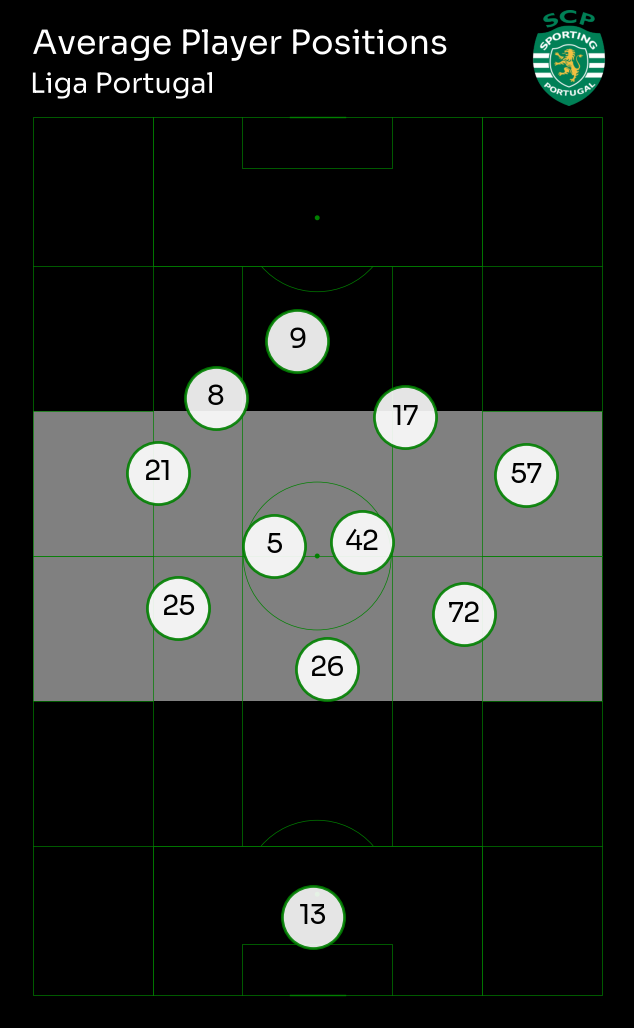

In [446]:
fig,ax=plt.subplots(figsize=(16,12), facecolor=background)
plot_avg_positions(df_avg_positions,'green',ax)

plt.savefig('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/SeasonReports/Sporting/1.png',dpi=500,bbox_inches = 'tight',facecolor=background)

## Chance Creation Zones

In [398]:
df.columns

Index(['Unnamed: 0.1', 'index', 'eventId', 'minute', 'second', 'teamId', 'x',
       'y', 'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers',
       'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY',
       'blockedX', 'blockedY', 'goalMouthZ', 'goalMouthY', 'isShot',
       'relatedEventId', 'relatedPlayerId', 'isGoal_x', 'cardType_x',
       'isOwnGoal_x', 'cumulative_mins', 'Unnamed: 0_x', 'isGoal_y',
       'cardType_y', 'isOwnGoal_y', 'Unnamed: 0_y', 'x1_bin_xT', 'y1_bin_xT',
       'x2_bin_xT', 'y2_bin_xT', 'start_zone_value_xT', 'end_zone_value_xT',
       'xT', 'teamName', 'oppositionTeamName', 'Unnamed: 0', 'shirtNo', 'name',
       'position', 'isFirstEleven', 'prog_pass', 'prog_carry',
       'pass_or_carry_angle', 'shortName'],
      dtype='object')

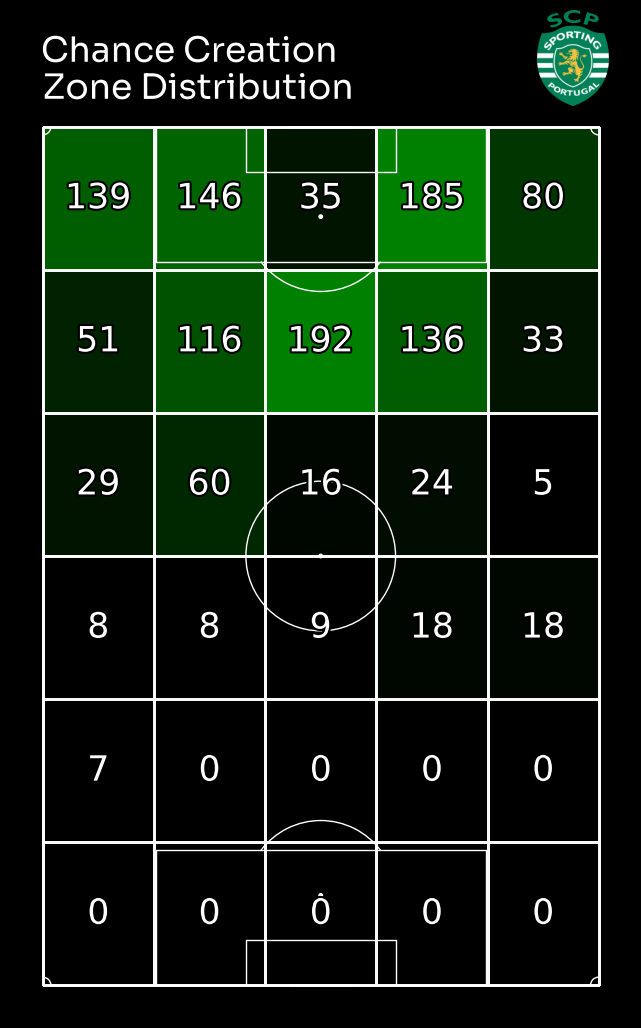

In [448]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
# setting the custom colormap
pearl_earring_cmaph = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors", [background, 'green'], N=20)

path_eff = [path_effects.Stroke(linewidth=3, foreground=background), path_effects.Normal()]

def Chance_creating_zone(ax, cm, col):
    ccp = df[df['qualifiers'].str.contains('KeyPass')]
    pitch = VerticalPitch(pitch_type='uefa', line_color='white', corner_arcs=True, line_zorder=2, pitch_color=background, linewidth=1)
    pitch.draw(ax=ax)
    #ax.set_xlim(-0.5, 105.5)

    cc = 0
    pearl_earring_cmap = cm
    bin_statistic = pitch.bin_statistic(ccp.x, ccp.y, bins=(6,5), statistic='count', normalize=False)
    pitch.heatmap(bin_statistic, ax=ax, cmap=pearl_earring_cmap, edgecolors='#f8f8f8')

    labels = pitch.label_heatmap(bin_statistic, color='white', fontsize=25, ax=ax, ha='center', va='center', str_format='{:.0f}', path_effects=path_eff)
    ax.text(30,116,f"Chance Creation  \n    Zone Distribution", color='white', fontsize=25, ha='right', va='top', fontweight='bold', path_effects=path_eff,fontproperties=font_prop)

    img_team = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/TeamLogos/Sporting.png')
    ax_image = add_image(
    img_team, fig, left=0.63, bottom=0.87, width=0.08, height=0.08,aspect='equal'
    )

fig,ax=plt.subplots(figsize=(16,12), facecolor=background)
chance_creating_stats_home = Chance_creating_zone(ax, pearl_earring_cmaph, 'green')
plt.savefig('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/SeasonReports/Sporting/2.png',dpi=500,bbox_inches = 'tight',facecolor=background)

## Comparison Pizza Plots

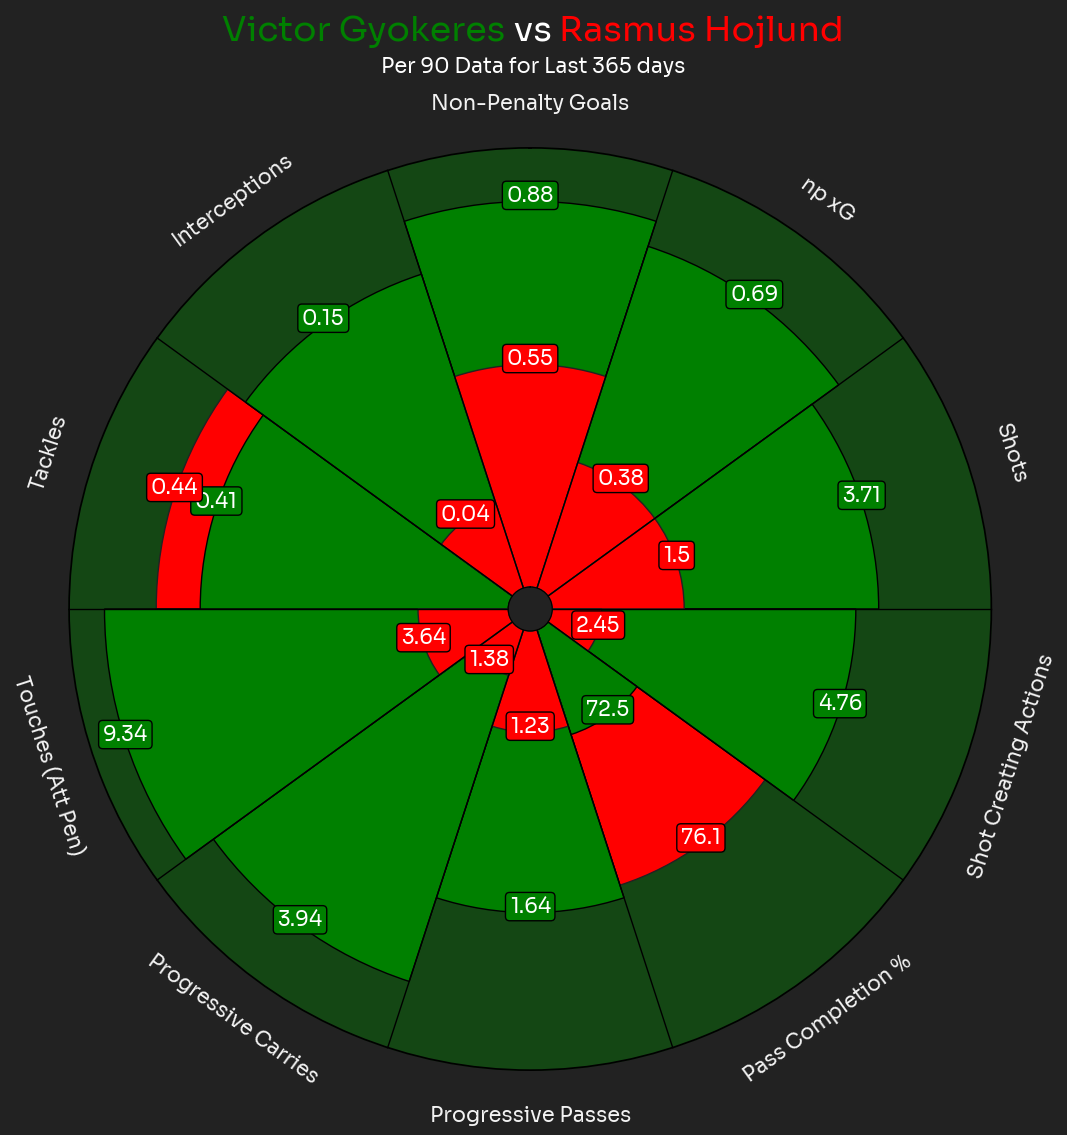

In [450]:
from highlight_text import fig_text

from mplsoccer import PyPizza, FontManager

params = [
    "Non-Penalty Goals", "np xG", "Shots", "Shot Creating Actions",
    "Pass Completion %", "Progressive Passes", "Progressive Carries", "Touches (Att Pen)",
    "Tackles", "Interceptions"
]

victor = [0.88, 0.69, 3.71, 4.76, 72.5, 1.64, 3.94, 9.34, 0.41, 0.15]
hojlund = [0.55, 0.38, 1.5, 2.45, 76.1, 1.23, 1.38, 3.64, 0.44, 0.04]
zirkzee =  [0.26, 0.32, 2.8, 3.06, 78.1, 2.95, 1.74, 4.65, 0.91, 0.08]

# minimum range value and maximum range value for parameters
min_range = [0.1, 0.2, 0, 2, 70, 1, 1, 2, 0.2, 0]
max_range = [0.99, 0.8, 5, 6, 80, 2, 4.5, 10, 0.5, 0.2]

# instantiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, other_circle_lw=0,
    other_circle_color="#000000", straight_line_lw=1
)

# plot pizza
fig, ax = baker.make_pizza(
    victor,                     # list of values
    compare_values=hojlund,    # passing comparison values
    figsize=(12, 12),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="green", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="red", edgecolor="#222222", zorder=3, linewidth=1,
    ),                          # values to be used when plotting comparison slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=15, zorder=5,
        fontproperties=font_prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="white", fontsize=15,
        fontproperties=font_prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="green",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                           # values to be used when adding parameter-values
    kwargs_compare_values=dict(
        color="white", fontsize=15,
        fontproperties=font_prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="red",
            boxstyle="round,pad=0.2", lw=1
        )
    )
)

# add title
fig_text(
    0.515, 0.99, "<Victor Gyokeres> vs <Rasmus Hojlund>",
    size=25, fig=fig,
    highlight_textprops=[{"color": 'green'}, {"color": 'red'}],
    ha="center", fontproperties=font_prop, color="white"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Per 90 Data for Last 365 days",
    size=15,
    ha="center", fontproperties=font_prop, color="white"
)

plt.savefig('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/SeasonReports/Sporting/3.png',dpi=500,bbox_inches = 'tight',facecolor=background)

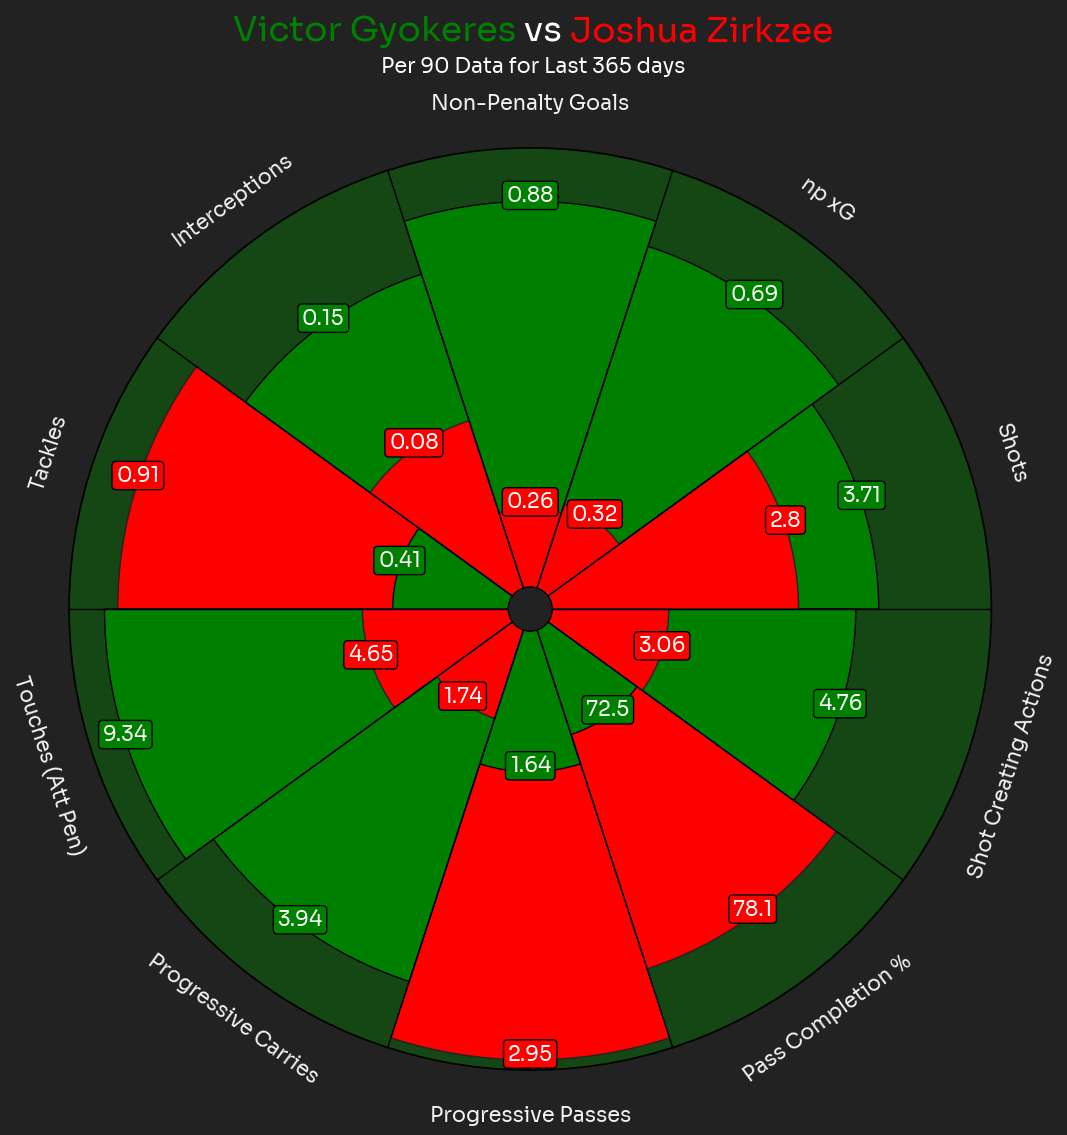

In [451]:
from highlight_text import fig_text

from mplsoccer import PyPizza, FontManager

params = [
    "Non-Penalty Goals", "np xG", "Shots", "Shot Creating Actions",
    "Pass Completion %", "Progressive Passes", "Progressive Carries", "Touches (Att Pen)",
    "Tackles", "Interceptions"
]

victor = [0.88, 0.69, 3.71, 4.76, 72.5, 1.64, 3.94, 9.34, 0.41, 0.15]
hojlund = [0.55, 0.38, 1.5, 2.45, 76.1, 1.23, 1.38, 3.64, 0.44, 0.04]
zirkzee =  [0.26, 0.32, 2.8, 3.06, 78.1, 2.95, 1.74, 4.65, 0.91, 0.08]

# minimum range value and maximum range value for parameters
min_range = [0.1, 0.2, 0, 2, 70, 1, 1, 2, 0.2, 0]
max_range = [0.99, 0.8, 5, 6, 80, 3, 4.5, 10, 1, 0.2]

# instantiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, other_circle_lw=0,
    other_circle_color="#000000", straight_line_lw=1
)

# plot pizza
fig, ax = baker.make_pizza(
    victor,                     # list of values
    compare_values=zirkzee,    # passing comparison values
    figsize=(12, 12),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="green", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="red", edgecolor="#222222", zorder=3, linewidth=1,
    ),                          # values to be used when plotting comparison slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=15, zorder=5,
        fontproperties=font_prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="white", fontsize=15,
        fontproperties=font_prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="green",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                           # values to be used when adding parameter-values
    kwargs_compare_values=dict(
        color="white", fontsize=15,
        fontproperties=font_prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="red",
            boxstyle="round,pad=0.2", lw=1
        )
    )
)

# add title
fig_text(
    0.515, 0.99, "<Victor Gyokeres> vs <Joshua Zirkzee>",
    size=25, fig=fig,
    highlight_textprops=[{"color": 'green'}, {"color": 'red'}],
    ha="center", fontproperties=font_prop, color="white"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Per 90 Data for Last 365 days",
    size=15,
    ha="center", fontproperties=font_prop, color="white"
)

plt.savefig('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/SeasonReports/Sporting/4.png',dpi=500,bbox_inches = 'tight',facecolor=background)

## Radar Plots

In [516]:
from mplsoccer import Radar, FontManager, grid

# parameter names of the statistics we want to show
params = ['Goals','npxG','Assists','Shot Creating Actions',
          'Passes Received','Pass Completion %','Progressive Passes','Progressive Carries',
          'Tackles','Interceptions','Clearances','Errors']


morita_values =    [0.14, 0.16, 0.14, 4.06, 50.7, 87.8, 8.26, 1.16, 2.17, 0.58, 1.45, 0.14]
casemiro_values =  [0.16, 0.15, 0.0, 4.92, 53.8, 79.5, 5.74, 0.49, 3.93, 0.82, 3.77, 0.49]
ugarte_values =    [0.0, 0.0, 0.0, 2.38, 35.7, 88, 2.38, 0.95, 4.29, 0.48, 1.96, 0.48]


braganca_values =   [0.42, 0.32, 0.42, 5.35, 58.5, 91.2, 7.32, 0.85, 1.97, 0.42, 0.85, 0.0]
mainoo_values =  [0.0, 0.02, 0.0, 1.11, 41.4, 88.2, 3.81, 0.79, 2.54, 2.22, 0.32, 0.16]
erikson_values = [0.0, 0.02, 0.0, 4.79, 44.0, 82.8, 5.42, 0.63, 0.83, 0.42, 0.83, 0.0]


# The lower and upper boundaries for the statistics
low =  [0.0, 0.0, 0.0, 1, 30,  70, 2, 0.0, 1, 0, 0, 0]
high = [0.3, 0.3, 0.2, 6, 60, 100, 10, 2, 6, 2, 5, 1]

# Add anything to this list where having a lower number is better
# this flips the statistic
lower_is_better = ['Errors']

radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

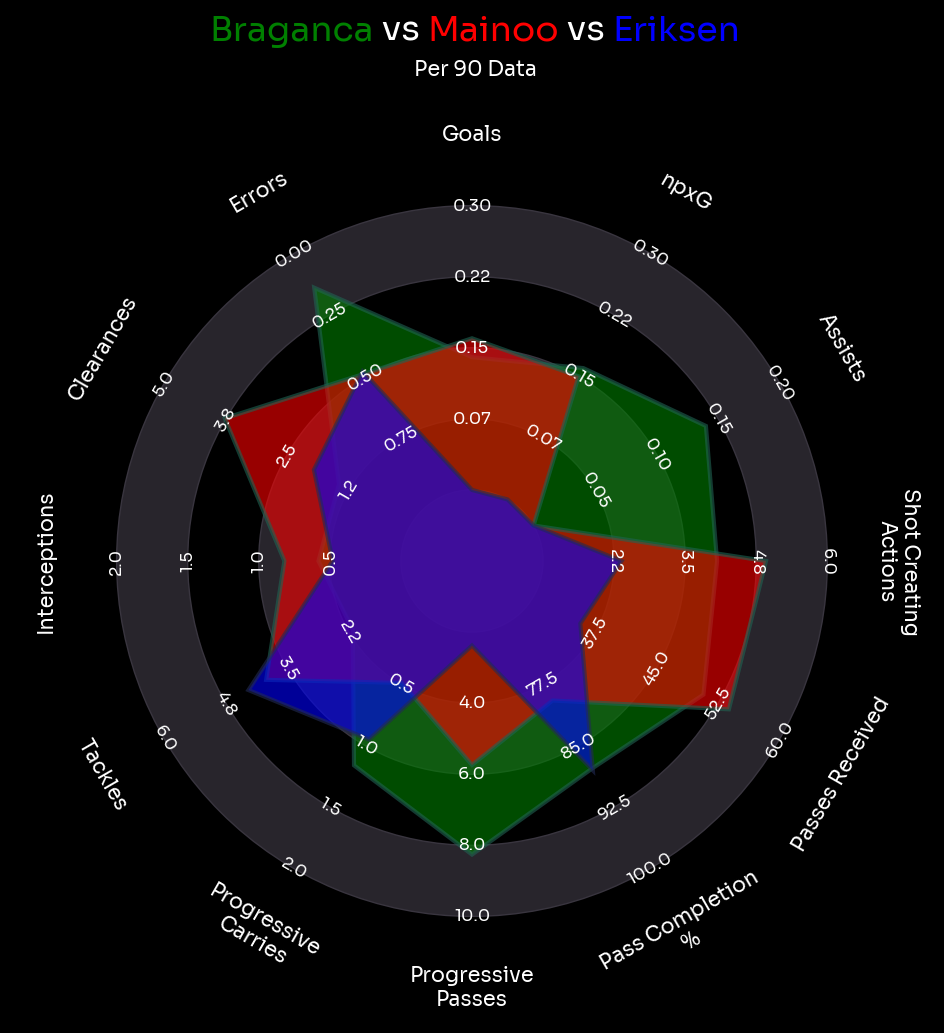

In [519]:
fig, ax = radar.setup_axis(facecolor=background)
fig.set_facecolor(background)


p1 = 'Braganca'
p2 = 'Mainoo'
p3 = 'Eriksen'
# add title
fig_text(
    0.515, 0.95, f"<{p1}> vs <{p2}> vs <{p3}>",
    size=25, fig=fig,
    highlight_textprops=[{"color": 'green'}, {"color": 'red'},{"color": 'blue'}],
    ha="center", fontproperties=font_prop, color="white"
)

# add subtitle
fig.text(
    0.515, 0.9,
    "Per 90 Data",
    size=15,
    ha="center", fontproperties=font_prop, color="white"
)
rings_inner = radar.draw_circles(ax=ax, facecolor='#28252c', edgecolor='#39353f')

radar1, vertices1 = radar.draw_radar_solid(morita_values, ax=ax,
                                           kwargs={'facecolor': 'green',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})

radar2, vertices2 = radar.draw_radar_solid(casemiro_values, ax=ax,
                                           kwargs={'facecolor': 'red',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})

radar3, vertices3 = radar.draw_radar_solid(ugarte_values, ax=ax,
                                           kwargs={'facecolor': 'blue',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#222b54',
                                                   'lw': 3})

#ax.scatter(vertices1[:, 0], vertices1[:, 1],
#           c='white', edgecolors='green', marker='o', s=100, zorder=2)
#ax.scatter(vertices2[:, 0], vertices2[:, 1],
#           c='white', edgecolors='red', marker='o', s=100, zorder=2)
#ax.scatter(vertices3[:, 0], vertices3[:, 1],
#           c='white', edgecolors='blue', marker='o', s=100, zorder=2)

range_labels = radar.draw_range_labels(ax=ax, fontsize=12, fontproperties=font_prop,color='white')
param_labels = radar.draw_param_labels(ax=ax, fontsize=15, fontproperties=font_prop,color='white')

plt.savefig('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/SeasonReports/Sporting/8.png',dpi=500,bbox_inches = 'tight',facecolor=background)

## PassMaps

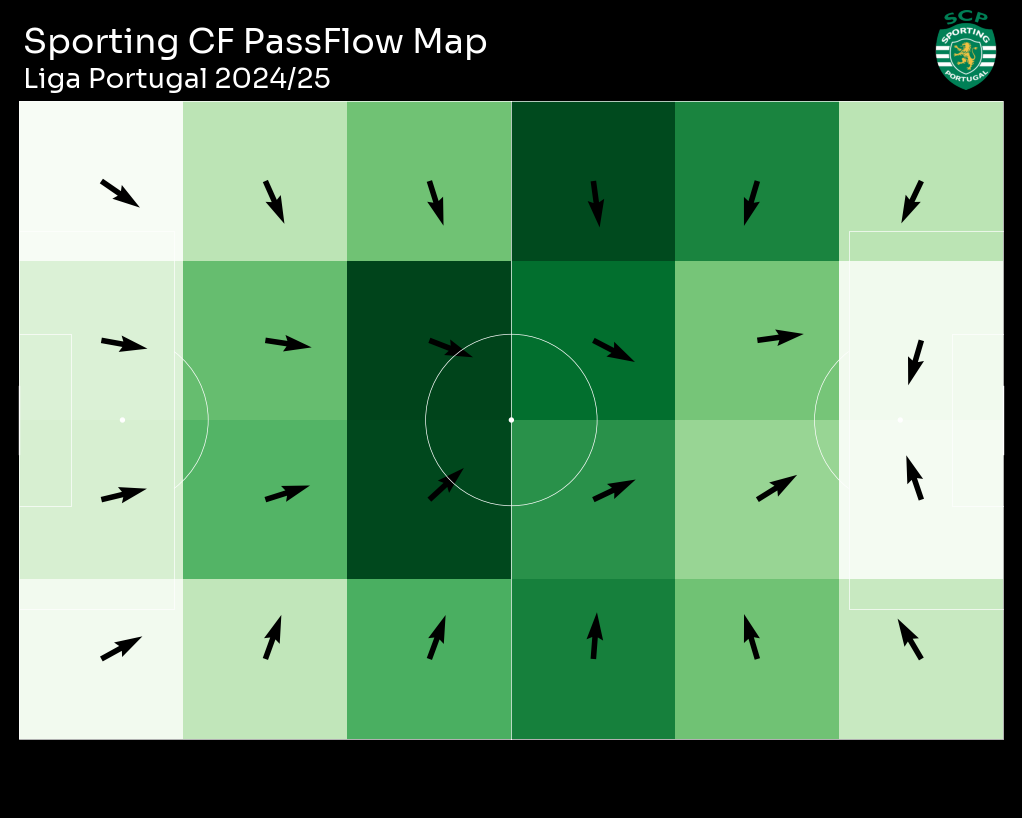

In [458]:
mask_passes = df.type == 'Pass'
passes_df = df.loc[mask_passes]
pitch = Pitch(pitch_type='uefa', pad_bottom=1, pad_top=1,pad_left=1, pad_right=1,
              line_zorder=2, line_color='white', pitch_color=background,linewidth=0.5)
bins = (6, 4)
fig, axs = pitch.grid(figheight=8,
                      title_height=0.1, title_space=0, grid_height=0.82,
                      axis=False)
fig.set_facecolor(background)

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(passes_df.x, passes_df.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=axs['pitch'], cmap='Greens')
# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(passes_df.x, passes_df.y, passes_df.endX, passes_df.endY,
                color='black', arrow_type='same',
                arrow_length=5, bins=bins, ax=axs['pitch'])

axs['title'].text(0.24, 0.6, f'Sporting CF PassFlow Map',
                  fontsize=25, fontproperties=font_prop,color='white', va='center', ha='center')
axs['title'].text(0.16, 0.15, f'Liga Portugal 2024/25',
                  fontsize=20, fontproperties=font_prop,color='white', va='center', ha='center')


img_team = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/TeamLogos/Sporting.png')
ax_image = add_image(
    img_team, fig, left=0.88, bottom=0.9, width=0.1, height=0.1,aspect='equal'
    )

plt.savefig('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/SeasonReports/Sporting/5.png',dpi=500,bbox_inches = 'tight',facecolor=background)

## Defensive Actions

In [401]:
def get_defensive_action_df(df):
    # filter only defensive actions
    defensive_actions_ids = df.index[(df['type'] == 'Aerial') & (df['qualifiers'].str.contains('Defensive')) |
                                     (df['type'] == 'BallRecovery') |
                                     (df['type'] == 'BlockedPass') |
                                     (df['type'] == 'Challenge') |
                                     (df['type'] == 'Clearance') |
                                     (df['type'] == 'Error') |
                                     (df['type'] == 'Foul') |
                                     (df['type'] == 'Interception') |
                                     (df['type'] == 'Tackle')]
    df_defensive_actions = df.loc[defensive_actions_ids, ["index", "x", "y", "teamName", "playerId", "type", "outcomeType"]]

    return df_defensive_actions

defensive_actions_df = get_defensive_action_df(df)

In [402]:
defensive_actions_df = defensive_actions_df.drop_duplicates()

In [403]:
defensive_actions_df['type'].unique()

array(['Aerial', 'Challenge', 'BallRecovery', 'Clearance', 'Foul',
       'BlockedPass', 'Interception', 'Tackle', 'Error'], dtype=object)

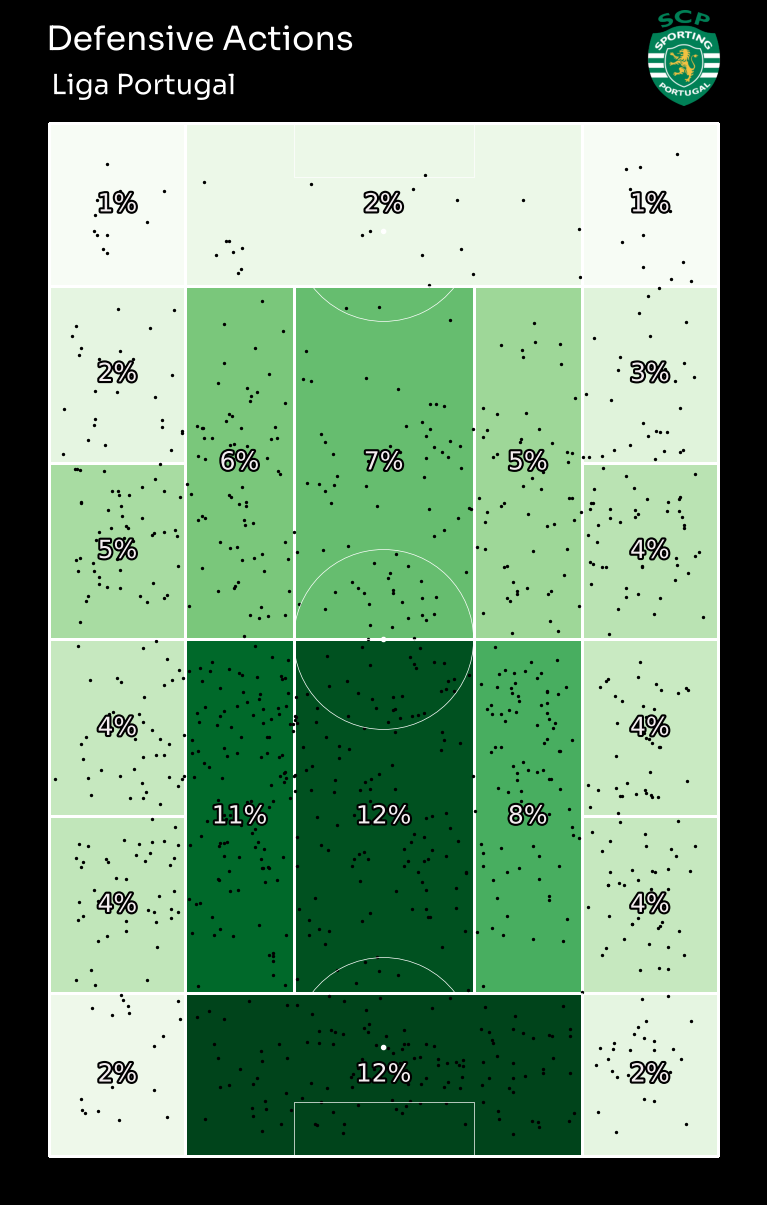

In [471]:
# setup pitch
pitch = VerticalPitch(pitch_type='uefa', line_zorder=2,
                      pitch_color=background, line_color='white',linewidth=0.5)
# draw
fig, ax = pitch.draw(figsize=(12, 12))
fig.set_facecolor(background)
bin_statistic = pitch.bin_statistic_positional(defensive_actions_df.x, defensive_actions_df.y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=ax, cmap='Greens', edgecolors='white')
        
pitch.scatter(defensive_actions_df.x, defensive_actions_df.y, c='black', s=2, ax=ax)
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

ax.text(37,115,f" Defensive Actions", color='white', fontsize=24, ha='right', va='top', fontweight='bold',
            path_effects=path_eff,fontproperties=font_prop)
ax.text(49,110,f"Liga Portugal", color='white', fontsize=20, ha='right', va='top', fontweight='bold',
            path_effects=path_eff,fontproperties=font_prop)


img_team = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/TeamLogos/Sporting.png')
ax_image = add_image(
    img_team, fig, left=0.71, bottom=0.92, width=0.08, height=0.08,aspect='equal'
    )

plt.savefig('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/SeasonReports/Sporting/6.png',dpi=500,bbox_inches = 'tight',facecolor=background)

## GK Analysis

In [472]:
df['name'].unique()

array([nan, 'Viktor Gyokeres', 'Hidemasa Morita', 'Nuno Santos',
       'Geovany Quenda', 'Eduardo Quaresma', 'Matheus Reis', 'Pote',
       'Ousmane Diomande', 'Zeno Debast', 'Geny Catamo', 'Goncalo Inacio',
       'Morten Hjulmand', 'Trincao', 'Vladan Kovacevic',
       'Daniel Braganca', 'Franco Israel', 'Maximiliano Araujo',
       'Conrad Harder', 'Mateus Fernandes', 'Ivan Fresneda',
       'Jeremiah St. Juste', 'Marcus Edwards', 'Ricardo Esgaio',
       'Dario Essugo', 'Rodrigo Ribeiro'], dtype=object)

## Set Piece Analysis

In [327]:
df_team['type'].unique()

array(['Start', 'Pass', 'KeeperPickup', 'Aerial', 'Clearance',
       'BallTouch', 'Carry', 'Foul', 'BallRecovery', 'CornerAwarded',
       'OffsideProvoked', 'KeeperSweeper', 'TakeOn', 'Challenge',
       'Tackle', 'Dispossessed', 'Interception', 'MissedShots',
       'SavedShot', 'OffsidePass', 'BlockedPass', 'Save', 'Claim', 'Goal',
       'GoodSkill', 'ShieldBallOpp', 'Error', 'Card', 'SubstitutionOff',
       'SubstitutionOn', 'FormationChange', 'End', 'OffsideGiven',
       'Punch', 'CrossNotClaimed', 'ShotOnPost', 'PenaltyFaced',
       'Smother', 'FormationSet'], dtype=object)

In [469]:
df_team.reset_index(inplace=True)

In [471]:
def get_next_events_by_index(df, current_index, num_events=3, target_types=None):
    """
    Get the next consecutive rows based on DataFrame indices and filter by event type.
    Only process if the current event is of type 'Pass'.
    """
    # Check if the current event is a 'Pass'
    if df.loc[current_index, 'type'] != 'Pass':
        return []  # Return an empty list if the type is not 'Pass'

    # Get the valid range of indices for the next events
    max_index = len(df) - 1
    next_indices = [i for i in range(current_index + 1, current_index + 1 + num_events) if i <= max_index]
    
    # Fetch the rows using the valid indices
    next_events = df.iloc[next_indices].reset_index(drop=True)
    
    # Filter for relevant types, if provided
    if target_types:
        next_events = next_events[next_events['type'].isin(target_types)]
    
    return next_events.to_dict('records')

# Define the target types
target_types = ['SavedShot', 'MissedShots', 'ShotOnPost', 'Goal']

# Add next events for corners_1 using indices
df_team['next_events'] = df_team.index.map(
    lambda idx: get_next_events_by_index(df_team, idx, num_events=3, target_types=target_types)
)

C:\Users\acer\AppData\Local\Temp\ipykernel_13912\226485883.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team['next_events'] = df_team.index.map(


In [510]:
mask_corners_1 = (
    (df_team['type'] == 'Pass')  &
    ((df_team['x'].round(3) == 104.475) & (df_team['y'].round(3) == 67.660))
)

mask_corners_2 = (
    (df_team['type'] == 'Pass')  &
    ((df_team['x'].round(3) == 104.475) & (df_team['y'].round(3) == 0.340))
)

# Filter the DataFrame to get corner kick events
corners_1 = df_team.loc[mask_corners_1]
corners_2 = df_team.loc[mask_corners_2]

In [512]:
corners_1['next_events_type'] = corners_1['next_events'].apply(
    lambda next_events: [event['type'] for event in next_events] if next_events else None
)

corners_2['next_events_type'] = corners_2['next_events'].apply(
    lambda next_events: [event['type'] for event in next_events] if next_events else None
)


C:\Users\acer\AppData\Local\Temp\ipykernel_13912\3133059281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corners_1['next_events_type'] = corners_1['next_events'].apply(
C:\Users\acer\AppData\Local\Temp\ipykernel_13912\3133059281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corners_2['next_events_type'] = corners_2['next_events'].apply(


In [612]:
corners_1['shot_name'] = corners_1['next_events'].apply(
    lambda next_events: [event['name'] for event in next_events] if next_events else None
)

corners_2['shot_name'] = corners_2['next_events'].apply(
    lambda next_events: [event['name'] for event in next_events] if next_events else None
)

C:\Users\acer\AppData\Local\Temp\ipykernel_13912\2305591163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corners_1['shot_name'] = corners_1['next_events'].apply(
C:\Users\acer\AppData\Local\Temp\ipykernel_13912\2305591163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corners_2['shot_name'] = corners_2['next_events'].apply(


In [599]:
# Function to extract the x and y coordinates of the last shot from next_events
def extract_last_shot_coordinates(next_events):
    if next_events:
        # Filter out events that are shots (Shot types: 'SavedShot', 'MissedShot', 'ShotOnPost', 'Goal')
        shot_events = [event for event in next_events if event['type'] in ['SavedShot', 'MissedShots', 'ShotOnPost', 'Goal']]
        if shot_events:
            # Get the coordinates of the last shot event
            last_shot = shot_events[-1]
            return last_shot['x'], last_shot['y']
    return None, None  # Return None if no shots found

# Apply the function to extract coordinates for corners_1
corners_1['next_shot_x'], corners_1['next_shot_y'] = zip(*corners_1['next_events'].apply(extract_last_shot_coordinates))

# Apply the function to extract coordinates for corners_2
corners_2['next_shot_x'], corners_2['next_shot_y'] = zip(*corners_2['next_events'].apply(extract_last_shot_coordinates))

C:\Users\acer\AppData\Local\Temp\ipykernel_13912\2202748809.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corners_1['next_shot_x'], corners_1['next_shot_y'] = zip(*corners_1['next_events'].apply(extract_last_shot_coordinates))
C:\Users\acer\AppData\Local\Temp\ipykernel_13912\2202748809.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corners_2['next_shot_x'], corners_2['next_shot_y'] = zip(*corners_2['next_events'].apply(extract_last_shot_coordinates))


In [611]:
# Calculate the number of shots (next_events_type is not None)
corners_1['total_shots'] = corners_1['next_events_type'].apply(
    lambda x: 1 if x is not None else 0
)

# Calculate the number of goals (next_events_type contains 'Goal')
corners_1['goals'] = corners_1['next_events_type'].apply(
    lambda x: 1 if 'Goal' in (x if isinstance(x, list) else [x]) else 0
)

# Calculate the number of goals (next_events_type contains 'Goal')
corners_1['shots_ot'] = corners_1['next_events_type'].apply(
    lambda x: 1 if 'SavedShot' in (x if isinstance(x, list) else [x]) else 0
)

# Repeat for corners_2
corners_2['total_shots'] = corners_2['next_events_type'].apply(
    lambda x: 1 if x is not None else 0
)

corners_2['goals'] = corners_2['next_events_type'].apply(
    lambda x: 1 if 'Goal' in (x if isinstance(x, list) else [x]) else 0
)

corners_2['shots_ot'] = corners_2['next_events_type'].apply(
    lambda x: 1 if 'SavedShot' in (x if isinstance(x, list) else [x]) else 0
)

# Now you can calculate the total number of shots and goals by corner type
shots_by_corner_type_1 = corners_1.groupby('type')['total_shots'].sum()
goals_by_corner_type_1 = corners_1.groupby('type')['goals'].sum()
shots_ot_by_corner_type_1 = corners_1.groupby('type')['shots_ot'].sum()

shots_by_corner_type_2 = corners_2.groupby('type')['total_shots'].sum()
goals_by_corner_type_2 = corners_2.groupby('type')['goals'].sum()
shots_ot_by_corner_type_2 = corners_2.groupby('type')['shots_ot'].sum()

# Combine them to get a complete picture
corner_summary_1 = pd.DataFrame({
    'total_shots': shots_by_corner_type_1,
    'goals': goals_by_corner_type_1,
    'shots_ot': shots_ot_by_corner_type_1
})

corner_summary_2 = pd.DataFrame({
    'total_shots': shots_by_corner_type_2,
    'goals': goals_by_corner_type_2,
    'shots_ot': shots_ot_by_corner_type_2
})

C:\Users\acer\AppData\Local\Temp\ipykernel_13912\3394037563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corners_1['total_shots'] = corners_1['next_events_type'].apply(
C:\Users\acer\AppData\Local\Temp\ipykernel_13912\3394037563.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corners_1['goals'] = corners_1['next_events_type'].apply(
C:\Users\acer\AppData\Local\Temp\ipykernel_13912\3394037563.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [678]:
df_team['type'].unique()

array(['FormationSet', 'Start', 'Pass', 'Aerial', 'BallTouch', 'TakeOn',
       'KeeperPickup', 'Tackle', 'BallRecovery', 'Foul', 'CornerAwarded',
       'Clearance', 'Save', 'Dispossessed', 'Interception', 'BlockedPass',
       'GoodSkill', 'SavedShot', 'MissedShots', 'Goal', 'Challenge',
       'End', 'Card', 'Error', 'SubstitutionOff', 'SubstitutionOn',
       'OffsideProvoked', 'FormationChange', 'Claim', 'OffsidePass',
       'OffsideGiven', 'Punch', 'Smother', 'KeeperSweeper',
       'ShieldBallOpp', 'ShotOnPost', 'PenaltyFaced', 'CrossNotClaimed'],
      dtype=object)

In [624]:
print(f"Most Corners Taken By From Left {corners_1['name'].value_counts().idxmax()} {corners_1['name'].value_counts().max()}")
print(f"Most Corners Taken By From Right {corners_2['name'].value_counts().idxmax()} {corners_2['name'].value_counts().max()}")

print(f"Most Shots Taken By From Left {corners_1['shot_name'].value_counts().idxmax()} {corners_1['shot_name'].value_counts().max()}")
print(f"Most Shots Taken By From Right {corners_2['shot_name'].value_counts().idxmax()} {corners_2['shot_name'].value_counts().max()}")

Most Corners Taken By From Left Declan Rice 34
Most Corners Taken By From Right Bukayo Saka 39
Most Shots Taken By From Left ['Gabriel Magalhaes'] 2
Most Shots Taken By From Right ['Gabriel Magalhaes'] 6


C:\Users\acer\AppData\Local\Temp\ipykernel_13912\99791558.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pitch.annotate(corner_summary_1['total_shots'][0],xy = (85,45),color='white',ha='center', va='center',fontsize=35,zorder=3,fontproperties=font_prop,ax=ax['pitch'][0])
C:\Users\acer\AppData\Local\Temp\ipykernel_13912\99791558.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pitch.annotate(corner_summary_1['shots_ot'][0],xy = (85,34),color='white',ha='center', va='center',fontsize=35,zorder=3,fontproperties=font_prop,ax=ax['pitch'][0])
C:\Users\acer\AppData\Local\Temp\ipykernel_13912\99791558.py:55: Future

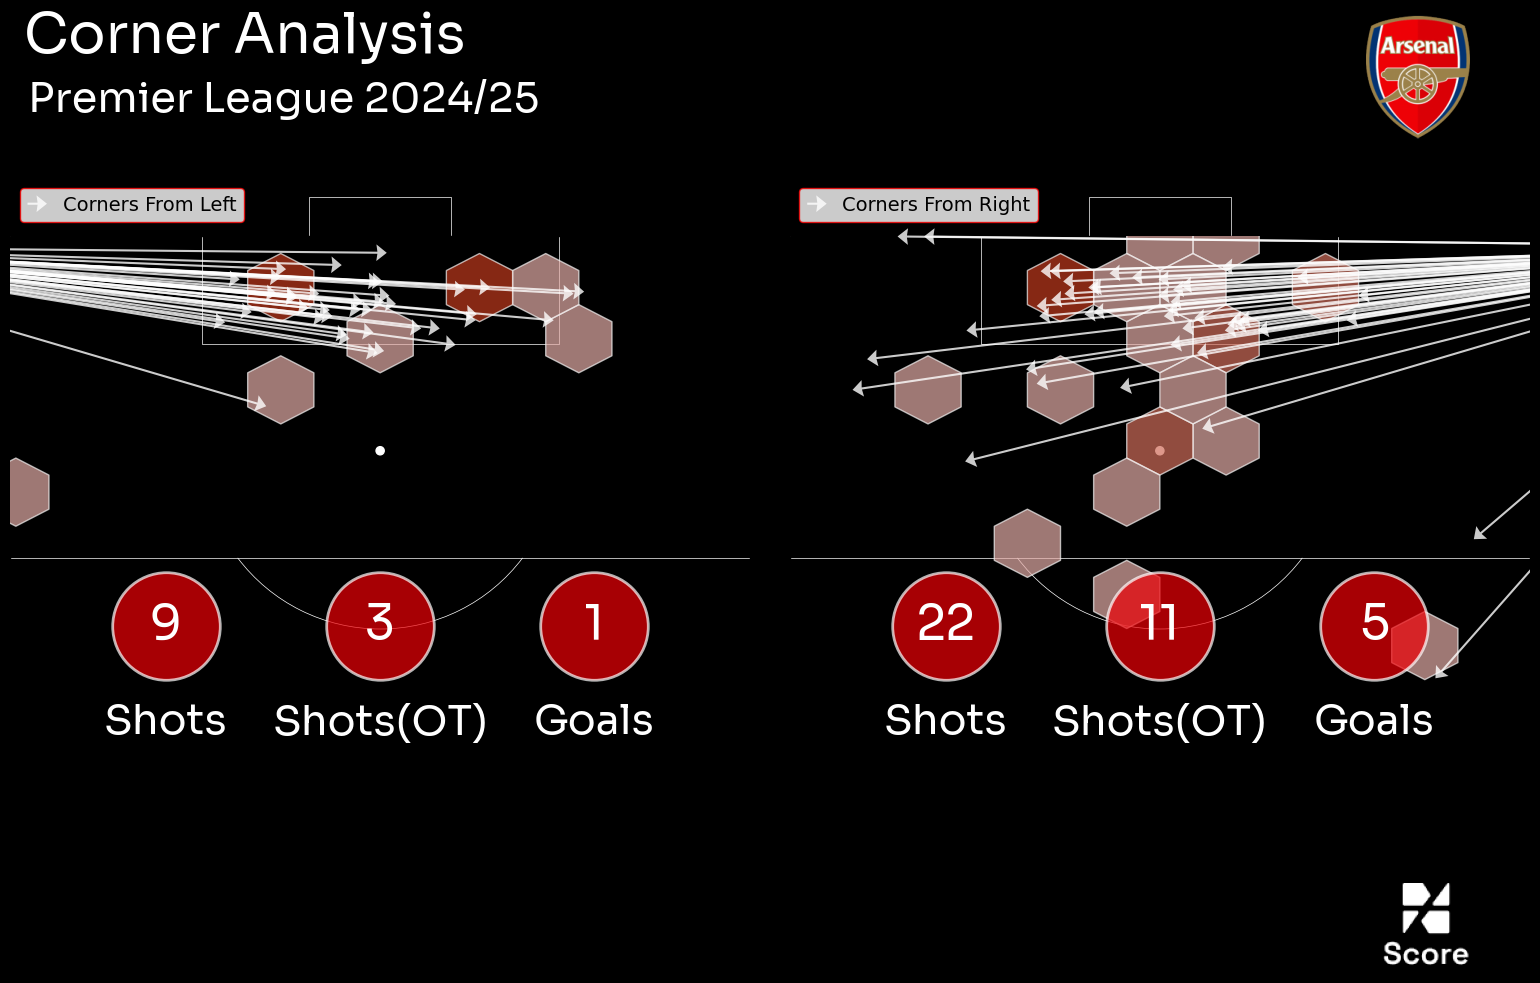

In [677]:
from matplotlib.colors import LinearSegmentedColormap
FIGWIDTH = 16
FIGHEIGHT = 9
NROWS = 1
NCOLS = 2
SPACE = 0.05
MAX_GRID = 0.95

pitch = VerticalPitch(pad_top=3, pad_bottom=-15,goal_type='box',
                      pad_left=-15, pad_right=-15, linewidth=0.5, half=True,pitch_type='uefa',
                      pitch_color=background, stripe=False, line_color='white')

GRID_WIDTH, GRID_HEIGHT = pitch.grid_dimensions(figwidth=FIGWIDTH, figheight=FIGHEIGHT,
                                                nrows=NROWS, ncols=NCOLS,
                                                max_grid=MAX_GRID, space=SPACE)
TITLE_HEIGHT = 0.08
ENDNOTE_HEIGHT = 0

fig, ax = pitch.grid(figheight=FIGHEIGHT, grid_width=GRID_WIDTH, grid_height=GRID_HEIGHT,
                     space=SPACE, ncols=NCOLS, nrows=NROWS, title_height=TITLE_HEIGHT,
                     endnote_height=ENDNOTE_HEIGHT, axis=False)
fig.set_facecolor(background)
pitch.arrows(corners_l.x, corners_l.y,
             corners_l.endX, corners_l.endY, width=1.5,alpha=0.8,zorder=3,
             headwidth=8, headlength=5, color='white', ax=ax['pitch'][0], label='Corners From Left')

pitch.arrows(corners_2.x, corners_2.y,
             corners_2.endX, corners_2.endY, width=1.5,alpha=0.8,zorder=3,
             headwidth=8, headlength=5, color='white', ax=ax['pitch'][1], label='Corners From Right')

# Set up the legend
ax['pitch'][0].legend(facecolor='white', handlelength=1, edgecolor='red', fontsize=14, loc='upper left')
# Set up the legend
ax['pitch'][1].legend(facecolor='white', handlelength=1, edgecolor='red', fontsize=14, loc='upper left')



flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 10 colors",
                                                  ['#e3aca7', '#c03a1d'], N=10)
hexmap = pitch.hexbin(corners_1.next_shot_x, corners_1.next_shot_y,zorder=2,alpha=0.7, ax=ax['pitch'][0], edgecolors='#f4f4f4',
                      gridsize=(20, 20), cmap=flamingo_cmap)
hexmap = pitch.hexbin(corners_2.next_shot_x, corners_2.next_shot_y,zorder=2,alpha=0.7, ax=ax['pitch'][1], edgecolors='#f4f4f4',
                      gridsize=(20, 20), cmap=flamingo_cmap)


pitch.scatter(85,45,color='#EF0107', s=6000, edgecolor='white', linewidth=2, alpha=0.7,marker='o',zorder=2,ax=ax['pitch'][0])
pitch.annotate(corner_summary_1['total_shots'][0],xy = (85,45),color='white',ha='center', va='center',fontsize=35,zorder=3,fontproperties=font_prop,ax=ax['pitch'][0])
pitch.annotate('Shots',xy = (80,45),color='white',ha='center', va='center',fontsize=30,zorder=3,fontproperties=font_prop,ax=ax['pitch'][0])

pitch.scatter(85,34,color='#EF0107', s=6000, edgecolor='white', linewidth=2, alpha=0.7,marker='o',zorder=2,ax=ax['pitch'][0])
pitch.annotate(corner_summary_1['shots_ot'][0],xy = (85,34),color='white',ha='center', va='center',fontsize=35,zorder=3,fontproperties=font_prop,ax=ax['pitch'][0])
pitch.annotate('Shots(OT)',xy = (80,34),color='white',ha='center', va='center',fontsize=30,zorder=3,fontproperties=font_prop,ax=ax['pitch'][0])

pitch.scatter(85,23,color='#EF0107', s=6000, edgecolor='white', linewidth=2, alpha=0.7,marker='o',zorder=2,ax=ax['pitch'][0])
pitch.annotate(corner_summary_1['goals'][0],xy = (85,23),color='white',ha='center', va='center',fontsize=35,zorder=3,fontproperties=font_prop,ax=ax['pitch'][0])
pitch.annotate('Goals',xy = (80,23),color='white',ha='center', va='center',fontsize=30,zorder=3,fontproperties=font_prop,ax=ax['pitch'][0])


pitch.scatter(85,45,color='#EF0107', s=6000, edgecolor='white', linewidth=2, alpha=0.7,marker='o',zorder=2,ax=ax['pitch'][1])
pitch.annotate(corner_summary_2['total_shots'][0],xy = (85,45),color='white',ha='center', va='center',fontsize=35,zorder=3,fontproperties=font_prop,ax=ax['pitch'][1])
pitch.annotate('Shots',xy = (80,45),color='white',ha='center', va='center',fontsize=30,zorder=3,fontproperties=font_prop,ax=ax['pitch'][1])

pitch.scatter(85,34,color='#EF0107', s=6000, edgecolor='white', linewidth=2, alpha=0.7,marker='o',zorder=2,ax=ax['pitch'][1])
pitch.annotate(corner_summary_2['shots_ot'][0],xy = (85,34),color='white',ha='center', va='center',fontsize=35,zorder=3,fontproperties=font_prop,ax=ax['pitch'][1])
pitch.annotate('Shots(OT)',xy = (80,34),color='white',ha='center', va='center',fontsize=30,zorder=3,fontproperties=font_prop,ax=ax['pitch'][1])


pitch.scatter(85,23,color='#EF0107', s=6000, edgecolor='white', linewidth=2, alpha=0.7,marker='o',zorder=2,ax=ax['pitch'][1])
pitch.annotate(corner_summary_2['goals'][0],xy = (85,23),color='white',ha='center', va='center',fontsize=35,zorder=3,fontproperties=font_prop,ax=ax['pitch'][1])
pitch.annotate('Goals',xy = (80,23),color='white',ha='center', va='center',fontsize=30,zorder=3,fontproperties=font_prop,ax=ax['pitch'][1])

img_team = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/TeamLogos/Arsenal.png')
ax_image = add_image(
img_team, fig, left=0.83, bottom=0.93, width=0.15, height=0.15,aspect='equal')

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
logo, fig, left=0.86, bottom=0.01, width=0.1, height=0.1,aspect='equal')


fig.text(0.31,1.05,f"Corner Analysis", fontsize=40,fontproperties=font_prop,ha='right', va='center', color='white')
fig.text(0.356,0.98,f"Premier League 2024/25", fontsize=30,fontproperties=font_prop,ha='right', va='center', color='white')

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/SeasonReports/Arsenal/CornerAnalysis.png',dpi=500,bbox_inches = 'tight',facecolor=background)

In [326]:
#### Stats - Shots / Goals / xG from Understat Data , Combined xT , Most Corners From Player , Most Corners To

## High Turnovers

In [406]:
df['teamName'].unique()

array(['Sporting'], dtype=object)

In [407]:
# function to get possession chains, This part is also taken from the "jakeyk11.github.io" github repository and modified for my use
def get_possession_chains(events_df, chain_check, suc_evts_in_chain):
    # Initialise output
    events_out = pd.DataFrame()
    match_events_df = df.reset_index()

    # Isolate valid event types that contribute to possession
    match_pos_events_df = match_events_df[~match_events_df['type'].isin(['OffsideGiven', 'CornerAwarded','Start', 'Card', 'SubstitutionOff',
                                                                                  'SubstitutionOn', 'FormationChange','FormationSet', 'End'])].copy()

    # Add temporary binary outcome and team identifiers
    match_pos_events_df['outcomeBinary'] = (match_pos_events_df['outcomeType']
                                                .apply(lambda x: 1 if x == 'Successful' else 0))
    match_pos_events_df['teamBinary'] = (match_pos_events_df['teamName']
                         .apply(lambda x: 1 if x == min(match_pos_events_df['teamName']) else 0))
    match_pos_events_df['goalBinary'] = ((match_pos_events_df['type'] == 'Goal')
                         .astype(int).diff(periods=1).apply(lambda x: 1 if x < 0 else 0))

    # Create a dataframe to investigate possessions chains
    pos_chain_df = pd.DataFrame()

    # Check whether each event is completed by same team as the next (check_evts-1) events
    for n in np.arange(1, chain_check):
        pos_chain_df[f'evt_{n}_same_team'] = abs(match_pos_events_df['teamBinary'].diff(periods=-n))
        pos_chain_df[f'evt_{n}_same_team'] = pos_chain_df[f'evt_{n}_same_team'].apply(lambda x: 1 if x > 1 else x)
    pos_chain_df['enough_evt_same_team'] = pos_chain_df.sum(axis=1).apply(lambda x: 1 if x < chain_check - suc_evts_in_chain else 0)
    pos_chain_df['enough_evt_same_team'] = pos_chain_df['enough_evt_same_team'].diff(periods=1)
    pos_chain_df[pos_chain_df['enough_evt_same_team'] < 0] = 0

    match_pos_events_df['period'] = pd.to_numeric(match_pos_events_df['period'], errors='coerce')
    # Check there are no kick-offs in the upcoming (check_evts-1) events
    pos_chain_df['upcoming_ko'] = 0
    for ko in match_pos_events_df[(match_pos_events_df['goalBinary'] == 1) | (match_pos_events_df['period'].diff(periods=1))].index.values:
        ko_pos = match_pos_events_df.index.to_list().index(ko)
        pos_chain_df.iloc[ko_pos - suc_evts_in_chain:ko_pos, 5] = 1

    # Determine valid possession starts based on event team and upcoming kick-offs
    pos_chain_df['valid_pos_start'] = (pos_chain_df.fillna(0)['enough_evt_same_team'] - pos_chain_df.fillna(0)['upcoming_ko'])

    # Add in possession starts due to kick-offs (period changes and goals).
    pos_chain_df['kick_off_period_change'] = match_pos_events_df['period'].diff(periods=1)
    pos_chain_df['kick_off_goal'] = ((match_pos_events_df['type'] == 'Goal')
                     .astype(int).diff(periods=1).apply(lambda x: 1 if x < 0 else 0))
    pos_chain_df.loc[pos_chain_df['kick_off_period_change'] == 1, 'valid_pos_start'] = 1
    pos_chain_df.loc[pos_chain_df['kick_off_goal'] == 1, 'valid_pos_start'] = 1

    # Add first possession manually
    pos_chain_df['teamName'] = match_pos_events_df['teamName']
    pos_chain_df.loc[pos_chain_df.head(1).index, 'valid_pos_start'] = 1
    pos_chain_df.loc[pos_chain_df.head(1).index, 'possession_id'] = 1
    pos_chain_df.loc[pos_chain_df.head(1).index, 'possession_team'] = pos_chain_df.loc[pos_chain_df.head(1).index, 'teamName']

    # Iterate through valid possession starts and assign them possession ids
    valid_pos_start_id = pos_chain_df[pos_chain_df['valid_pos_start'] > 0].index

    possession_id = 2
    for idx in np.arange(1, len(valid_pos_start_id)):
        current_team = pos_chain_df.loc[valid_pos_start_id[idx], 'teamName']
        previous_team = pos_chain_df.loc[valid_pos_start_id[idx - 1], 'teamName']
        if ((previous_team == current_team) & (pos_chain_df.loc[valid_pos_start_id[idx], 'kick_off_goal'] != 1) &
                (pos_chain_df.loc[valid_pos_start_id[idx], 'kick_off_period_change'] != 1)):
            pos_chain_df.loc[valid_pos_start_id[idx], 'possession_id'] = np.nan
        else:
            pos_chain_df.loc[valid_pos_start_id[idx], 'possession_id'] = possession_id
            pos_chain_df.loc[valid_pos_start_id[idx], 'possession_team'] = pos_chain_df.loc[valid_pos_start_id[idx], 'teamName']
            possession_id += 1

    # Assign possession id and team back to events dataframe
    match_events_df = pd.merge(match_events_df, pos_chain_df[['possession_id', 'possession_team']], how='left', left_index=True, right_index=True)

    # Fill in possession ids and possession team
    match_events_df[['possession_id', 'possession_team']] = (match_events_df[['possession_id', 'possession_team']].fillna(method='ffill'))
    match_events_df[['possession_id', 'possession_team']] = (match_events_df[['possession_id', 'possession_team']].fillna(method='bfill'))

    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events_df])

    return events_out

In [408]:
df = get_possession_chains(df, 5, 3)

KeyboardInterrupt: 

In [380]:
def HighTO(ax):
    pitch = Pitch(pitch_type='uefa', corner_arcs=True, pitch_color=background, line_color='white', linewidth=0.5)
    pitch.draw(ax=ax)

    # High Turnover means any sequence which starts in open play and within 40 metres of the opponent's goal 
    highTO = df
    highTO['Distance'] = ((highTO['x'] - 105)**2 + (highTO['y'] - 34)**2)**0.5

    # HTO which led to Goal for away team
    agoal_count = 0
    # Iterate through the DataFrame
    for i in range(len(highTO)):
        if ((highTO.loc[i, 'type'] in ['BallRecovery', 'Interception']) and  
            (highTO.loc[i, 'Distance'] <= 40)):
            
            possession_id = highTO.loc[i, 'possession_id']
            
            # Check the following rows within the same possession
            j = i + 1
            while j < len(highTO) and highTO.loc[j, 'possession_id'] == possession_id:
                if highTO.loc[j, 'type'] == 'Goal':
                    ax.scatter(highTO.loc[i, 'x'],highTO.loc[i, 'y'], s=600, marker='*', color='green', edgecolor='k', zorder=3)
                    agoal_count += 1
                    break
                j += 1

    # HTO which led to Shot for away team
    ashot_count = 0
    # Iterate through the DataFrame
    for i in range(len(highTO)):
        if ((highTO.loc[i, 'type'] in ['BallRecovery', 'Interception']) and 
            (highTO.loc[i, 'Distance'] <= 40)):
            
            possession_id = highTO.loc[i, 'possession_id']
            
            # Check the following rows within the same possession
            j = i + 1
            while j < len(highTO) and highTO.loc[j, 'possession_id'] == possession_id:
                if ('Shot' in highTO.loc[j, 'type']):
                    ax.scatter(highTO.loc[i, 'x'],highTO.loc[i, 'y'], s=150, color='green', edgecolor=background, zorder=2)
                    ashot_count += 1
                    break
                j += 1
    
    # other HTO for away team
    aht_count = 0
    p_list = []
    # Iterate through the DataFrame
    for i in range(len(highTO)):
        if ((highTO.loc[i, 'type'] in ['BallRecovery', 'Interception']) and  (highTO.loc[i, 'Distance'] <= 40)):
            # Check the following rows
            j = i + 1
            if ((highTO.loc[j, 'type']!='Dispossessed') and (highTO.loc[j, 'type']!='OffsidePass')):
                ax.scatter(highTO.loc[i, 'x'],highTO.loc[i, 'y'], s=100, color='None', edgecolor='green')
                aht_count += 1
                p_list.append(highTO.loc[i, 'shortName'])

    # Plotting the half circle
    left_circle = plt.Circle((0,34), 40, color='green', fill=True, alpha=0.25, linestyle='dashed')
    ax.add_artist(left_circle)
    # Set the aspect ratio to be equal
    ax.set_aspect('equal', adjustable='box')
    # Headlines and other texts
    #ax.text(0, 70, f"{hteamName}\nHigh Turnover: {hht_count}", color='green', size=25, ha='left', fontweight='bold')
    #ax.text(105, 70, f"{ateamName}\nHigh Turnover: {aht_count}", color='green', size=25, ha='right', fontweight='bold')
    #ax.text(0,  -3, '<---Attacking Direction', color='green', fontsize=13, ha='left', va='center')
    #ax.text(105,-3, 'Attacking Direction--->', color='green', fontsize=13, ha='right', va='center')
    
    away_data = {
        'Total_High_Turnovers': aht_count,
        'Shot_Ending_High_Turnovers': ashot_count,
        'Goal_Ending_High_Turnovers': agoal_count
    }
    
    return away_data

KeyError: 'possession_id'

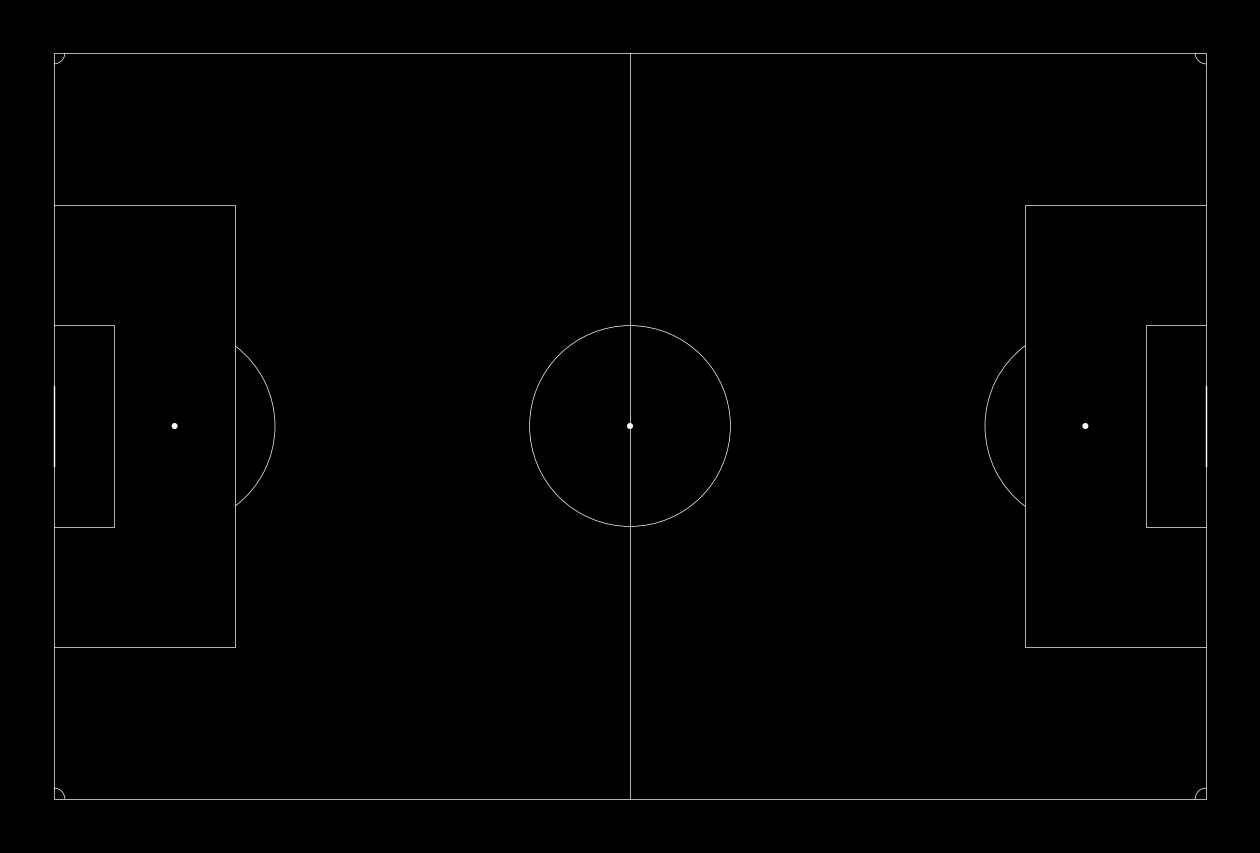

In [381]:
fig,ax=plt.subplots(figsize=(16,12), facecolor=background)
high_turnover_stats = HighTO(ax)
high_turnover_stats_df = pd.DataFrame(high_turnover_stats)